In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v4
from Resources.Game import *


In [2]:
'''
v4: 0 - 10610 

v4: 10610 - 

    scale value diff before softmax to follow promising lines more often

'''

'\nv4: 0 - 10610 \n\nv4: 10610 - \n\n    scale value diff before softmax to follow promising lines more often\n\n'

In [3]:
gamma = 0.98
value_diff_scale = 50

error_hist = torch.load('./error_hist MC v4')
game_count = 36510
draw_count = 0

criterion = nn.MSELoss()
model = Model_v4() # Conv large
model.train()
model.load_state_dict(torch.load('../Monte Carlo//Model Saves MC v4/model_36510_games'))
white_wins = 0
black_wins = 0
draws = 0

In [48]:
white_wins = 0
black_wins = 0
draws = 0

 -- 31490 -- winner: black, i: 44    wins: w = 3255, b = 3325.0, d = 11983
 -- 31500 -- winner: black, i: 60    wins: w = 3259, b = 3331.0, d = 11995


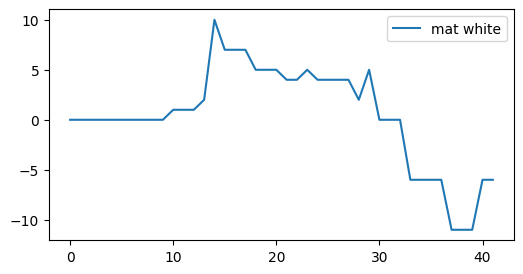

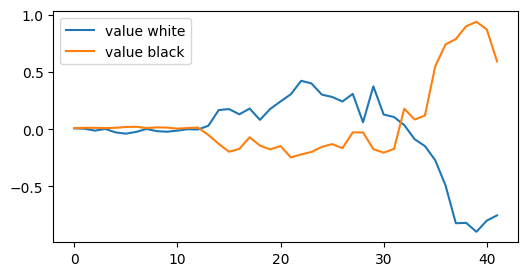

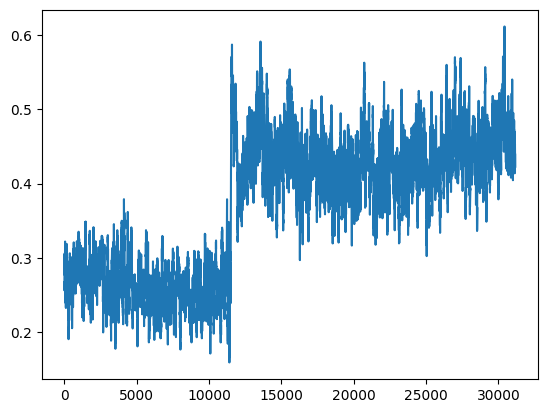

 -- 31510 -- winner: black, i: 84    wins: w = 3262, b = 3338.0, d = 12021
 -- 31520 -- winner: black, i: 58    wins: w = 3265, b = 3345.0, d = 12036
 -- 31530 -- winner: white, i: 47    wins: w = 3271, b = 3349.0, d = 12045
 -- 31540 -- winner: white, i: 79    wins: w = 3277, b = 3353.0, d = 12057
 -- 31550 -- winner: white, i: 13    wins: w = 3284, b = 3356.0, d = 12082


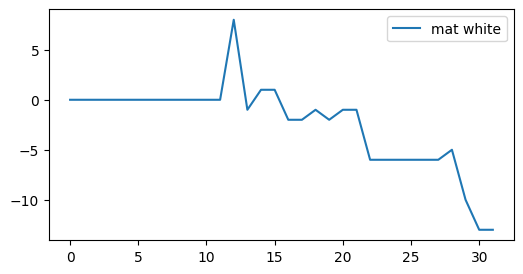

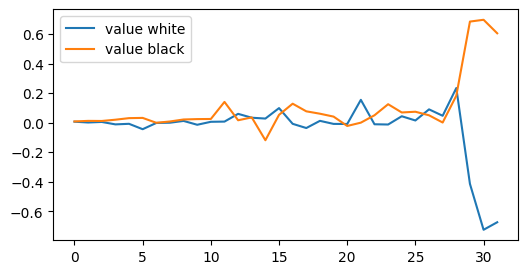

 -- 31560 -- winner: black, i: 54    wins: w = 3288, b = 3362.0, d = 12095
 -- 31570 -- winner: white, i: 69    wins: w = 3293, b = 3367.0, d = 12114
 -- 31580 -- winner: white, i: 31    wins: w = 3298, b = 3372.0, d = 12128
 -- 31590 -- winner: black, i: 160    wins: w = 3303, b = 3377.0, d = 12147
 -- 31600 -- winner: black, i: 72    wins: w = 3308, b = 3382.0, d = 12156


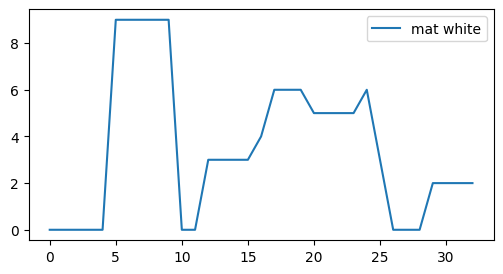

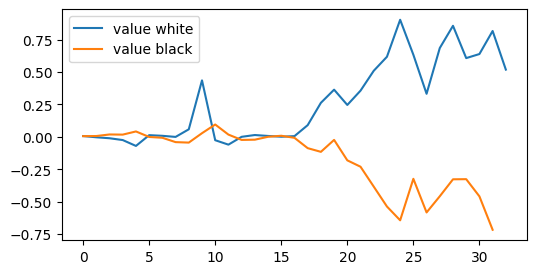

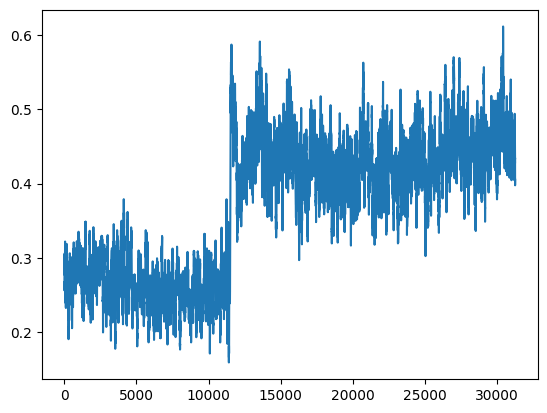

 -- 31610 -- winner: black, i: 58    wins: w = 3314, b = 3386.0, d = 12168
 -- 31620 -- winner: white, i: 65    wins: w = 3320, b = 3390.0, d = 12171
 -- 31630 -- winner: white, i: 101    wins: w = 3324, b = 3396.0, d = 12185
 -- 31640 -- winner: white, i: 73    wins: w = 3329, b = 3401.0, d = 12194
 -- 31650 -- winner: black, i: 26    wins: w = 3334, b = 3406.0, d = 12206


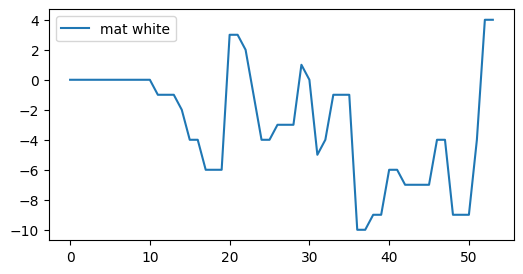

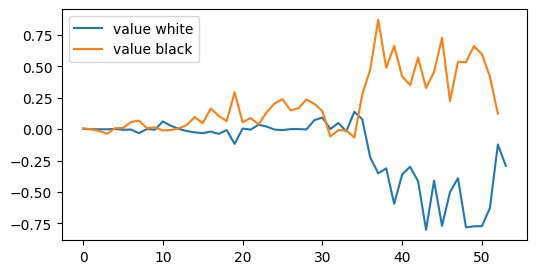

 -- 31660 -- winner: black, i: 58    wins: w = 3341, b = 3409.0, d = 12217
 -- 31670 -- winner: black, i: 60    wins: w = 3345, b = 3415.0, d = 12226
 -- 31680 -- winner: black, i: 98    wins: w = 3348, b = 3422.0, d = 12240
 -- 31690 -- winner: black, i: 10    wins: w = 3352, b = 3428.0, d = 12254
 -- 31700 -- winner: white, i: 49    wins: w = 3356, b = 3434.0, d = 12270


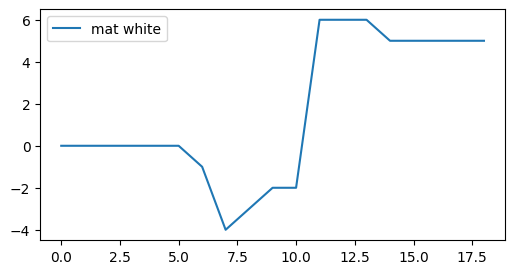

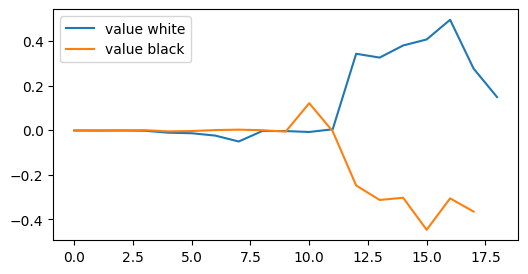

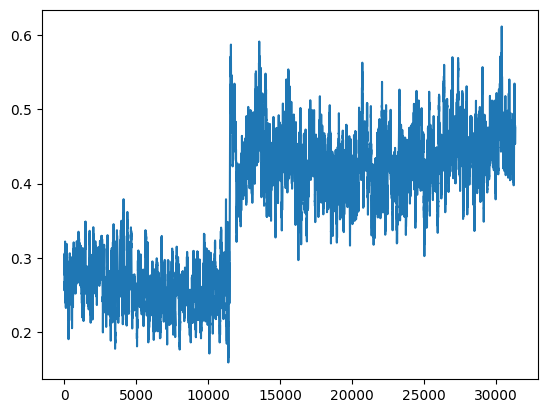

 -- 31710 -- winner: white, i: 65    wins: w = 3362, b = 3438.0, d = 12278
 -- 31720 -- winner: white, i: 57    wins: w = 3366, b = 3444.0, d = 12300
 -- 31730 -- winner: black, i: 60    wins: w = 3370, b = 3450.0, d = 12322
 -- 31740 -- winner: white, i: 85    wins: w = 3372, b = 3458.0, d = 12331
 -- 31750 -- winner: black, i: 82    wins: w = 3374, b = 3466.0, d = 12340


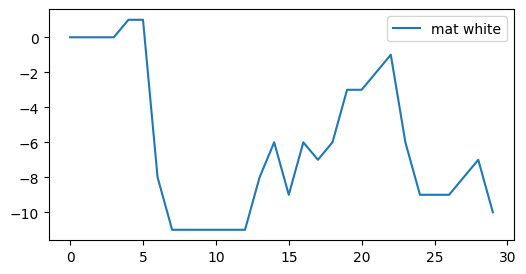

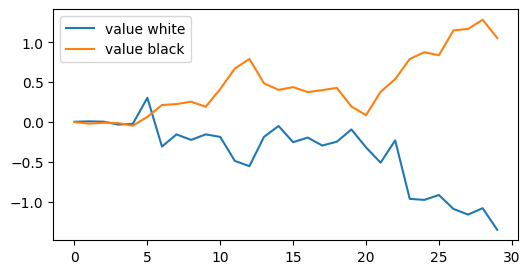

 -- 31760 -- winner: white, i: 71    wins: w = 3379, b = 3471.0, d = 12348
 -- 31770 -- winner: black, i: 78    wins: w = 3385, b = 3475.0, d = 12362
 -- 31780 -- winner: white, i: 83    wins: w = 3391, b = 3479.0, d = 12370
 -- 31790 -- winner: white, i: 69    wins: w = 3395, b = 3485.0, d = 12377
 -- 31800 -- winner: black, i: 74    wins: w = 3399, b = 3491.0, d = 12399


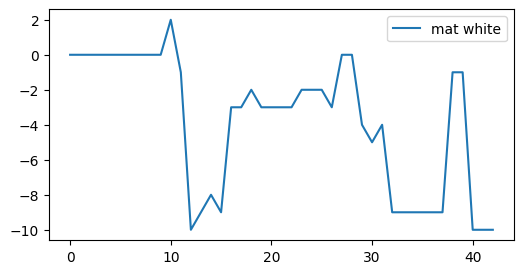

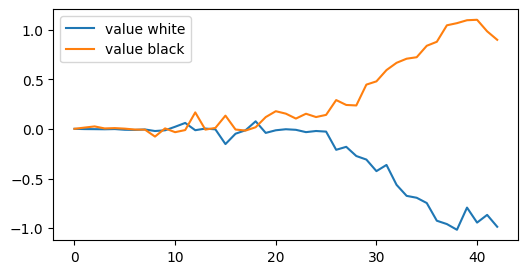

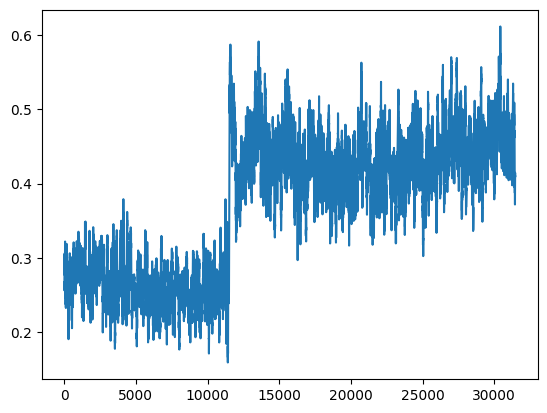

 -- 31810 -- winner: white, i: 65    wins: w = 3403, b = 3497.0, d = 12405
 -- 31820 -- winner: black, i: 98    wins: w = 3407, b = 3503.0, d = 12415
 -- 31830 -- winner: white, i: 53    wins: w = 3412, b = 3508.0, d = 12427
 -- 31840 -- winner: black, i: 116    wins: w = 3419, b = 3511.0, d = 12440
 -- 31850 -- winner: black, i: 54    wins: w = 3423, b = 3517.0, d = 12469


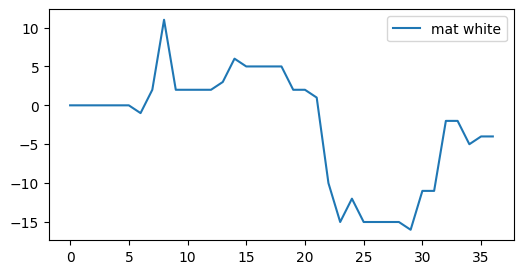

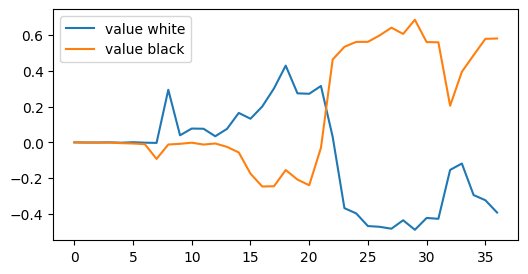

 -- 31860 -- winner: white, i: 7    wins: w = 3427, b = 3523.0, d = 12482
 -- 31870 -- winner: white, i: 77    wins: w = 3433, b = 3527.0, d = 12487
 -- 31880 -- winner: black, i: 66    wins: w = 3436, b = 3534.0, d = 12507
 -- 31890 -- winner: white, i: 97    wins: w = 3441, b = 3539.0, d = 12517
 -- 31900 -- winner: white, i: 9    wins: w = 3448, b = 3542.0, d = 12520


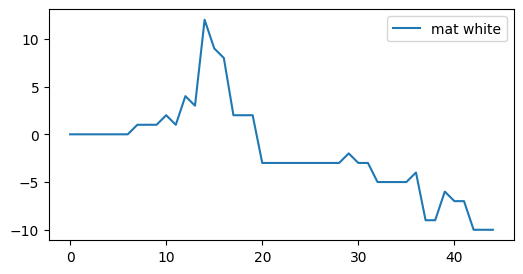

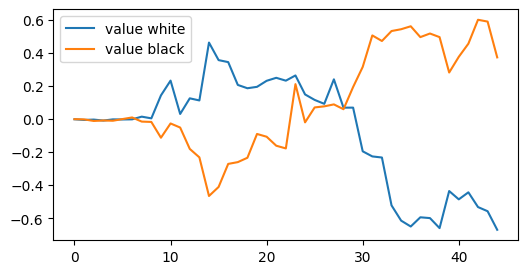

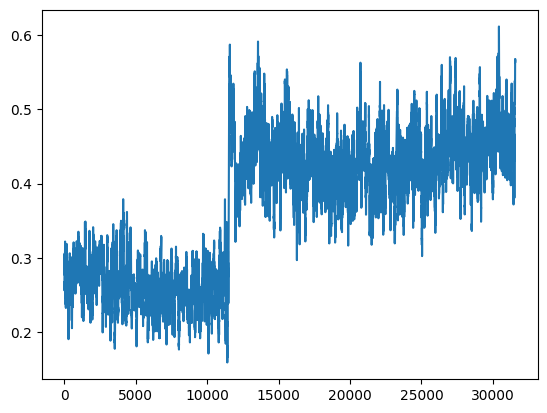

 -- 31910 -- winner: white, i: 35    wins: w = 3454, b = 3546.0, d = 12537
 -- 31920 -- winner: black, i: 96    wins: w = 3460, b = 3550.0, d = 12568
 -- 31930 -- winner: white, i: 105    wins: w = 3468, b = 3552.0, d = 12579
 -- 31940 -- winner: white, i: 57    wins: w = 3475, b = 3555.0, d = 12587
 -- 31950 -- winner: white, i: 91    wins: w = 3480, b = 3560.0, d = 12600


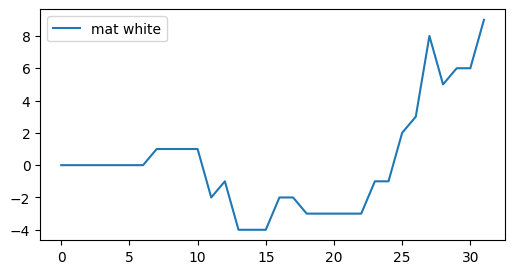

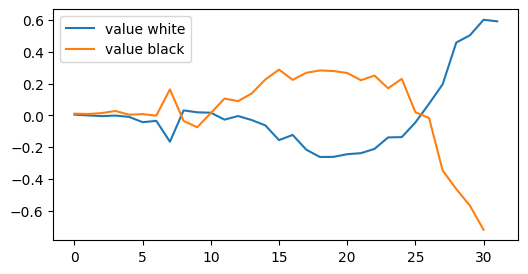

 -- 31960 -- winner: white, i: 23    wins: w = 3484, b = 3566.0, d = 12609
 -- 31970 -- winner: white, i: 47    wins: w = 3491, b = 3569.0, d = 12618
 -- 31980 -- winner: black, i: 214    wins: w = 3497, b = 3573.0, d = 12629
 -- 31990 -- winner: white, i: 37    wins: w = 3504, b = 3576.0, d = 12646
 -- 32000 -- winner: white, i: 9    wins: w = 3507, b = 3583.0, d = 12666


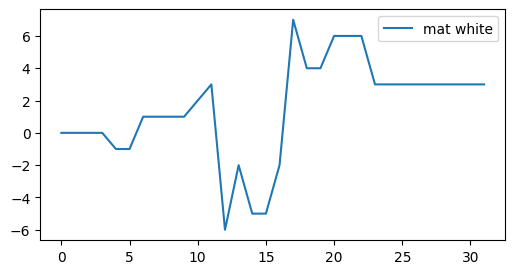

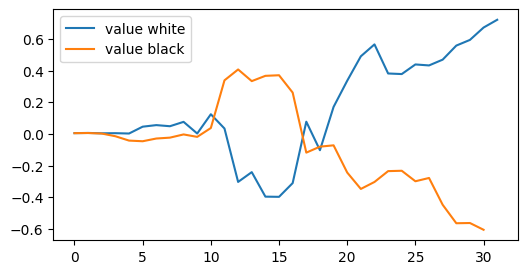

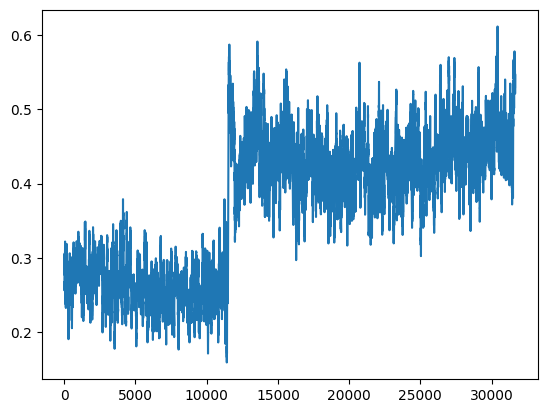

 -- 32010 -- winner: white, i: 53    wins: w = 3513, b = 3587.0, d = 12687
 -- 32020 -- winner: black, i: 68    wins: w = 3516, b = 3594.0, d = 12699
 -- 32030 -- winner: white, i: 33    wins: w = 3522, b = 3598.0, d = 12706
 -- 32040 -- winner: black, i: 88    wins: w = 3526, b = 3604.0, d = 12712
 -- 32050 -- winner: black, i: 88    wins: w = 3530, b = 3610.0, d = 12714


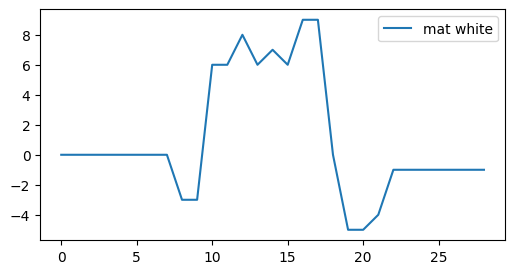

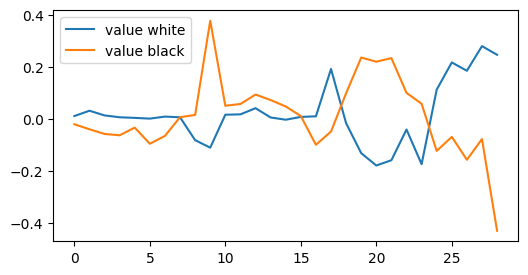

 -- 32060 -- winner: white, i: 89    wins: w = 3533, b = 3617.0, d = 12737
 -- 32070 -- winner: white, i: 105    wins: w = 3537, b = 3623.0, d = 12755
 -- 32080 -- winner: white, i: 41    wins: w = 3540, b = 3630.0, d = 12764
 -- 32090 -- winner: white, i: 37    wins: w = 3549, b = 3631.0, d = 12773
 -- 32100 -- winner: black, i: 52    wins: w = 3554, b = 3636.0, d = 12785


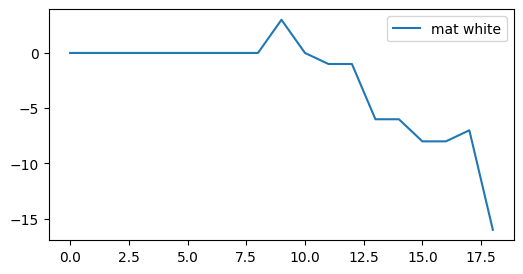

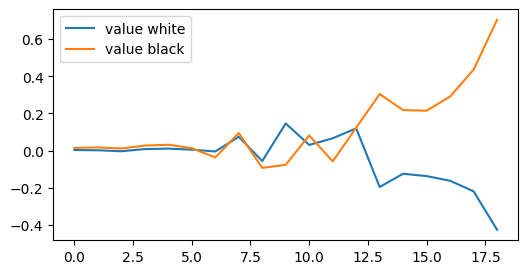

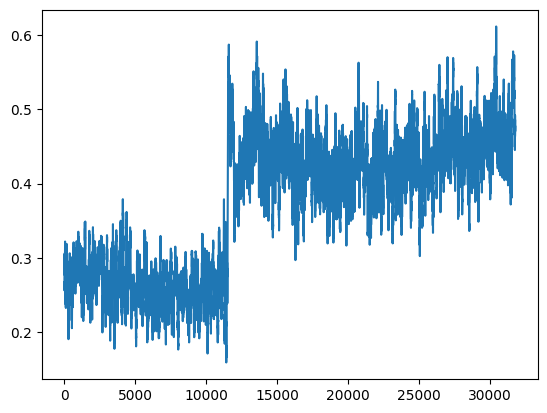

 -- 32110 -- winner: white, i: 13    wins: w = 3560, b = 3640.0, d = 12800
 -- 32120 -- winner: white, i: 41    wins: w = 3563, b = 3647.0, d = 12821
 -- 32130 -- winner: black, i: 88    wins: w = 3568, b = 3652.0, d = 12837
 -- 32140 -- winner: white, i: 27    wins: w = 3572, b = 3658.0, d = 12840
 -- 32150 -- winner: black, i: 78    wins: w = 3573, b = 3667.0, d = 12857


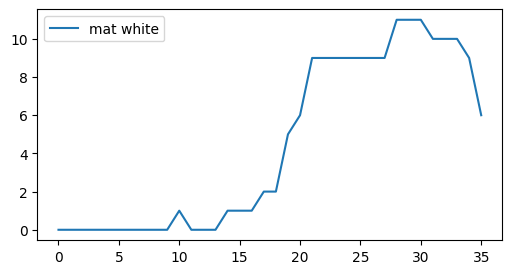

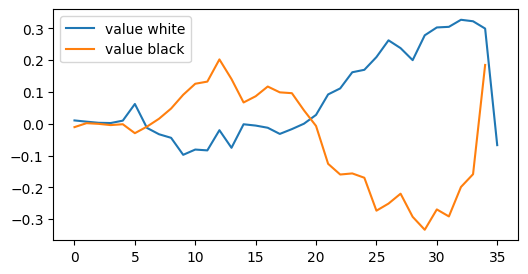

 -- 32160 -- winner: black, i: 88    wins: w = 3579, b = 3671.0, d = 12867
 -- 32170 -- winner: black, i: 72    wins: w = 3584, b = 3676.0, d = 12872
 -- 32180 -- winner: white, i: 69    wins: w = 3591, b = 3679.0, d = 12890
 -- 32190 -- winner: black, i: 78    wins: w = 3595, b = 3685.0, d = 12904
 -- 32200 -- winner: black, i: 36    wins: w = 3601, b = 3689.0, d = 12919


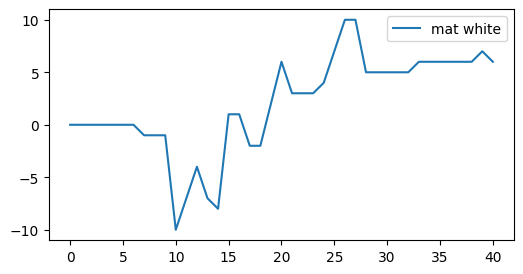

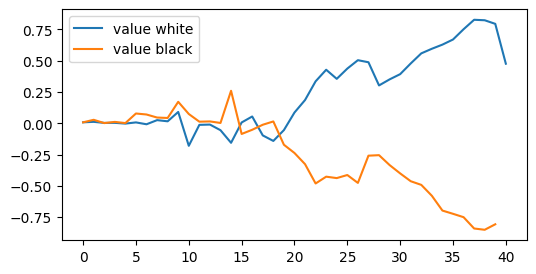

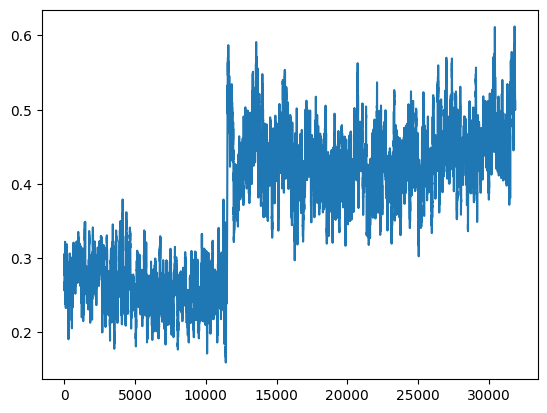

 -- 32210 -- winner: black, i: 96    wins: w = 3608, b = 3692.0, d = 12938
 -- 32220 -- winner: white, i: 87    wins: w = 3614, b = 3696.0, d = 12953
 -- 32230 -- winner: black, i: 84    wins: w = 3619, b = 3701.0, d = 12957
 -- 32240 -- winner: white, i: 47    wins: w = 3622, b = 3708.0, d = 12974
 -- 32250 -- winner: white, i: 91    wins: w = 3627, b = 3713.0, d = 12995


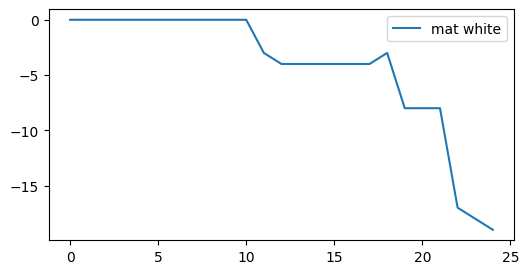

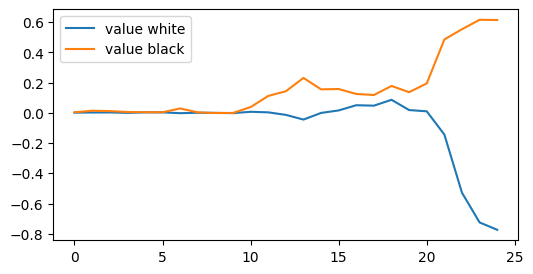

 -- 32260 -- winner: black, i: 74    wins: w = 3633, b = 3717.0, d = 13021
 -- 32270 -- winner: white, i: 145    wins: w = 3639, b = 3721.0, d = 13032
 -- 32280 -- winner: white, i: 7    wins: w = 3644, b = 3726.0, d = 13048
 -- 32290 -- winner: white, i: 71    wins: w = 3649, b = 3731.0, d = 13060
 -- 32300 -- winner: white, i: 13    wins: w = 3654, b = 3736.0, d = 13079


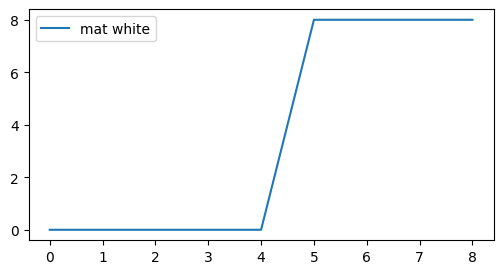

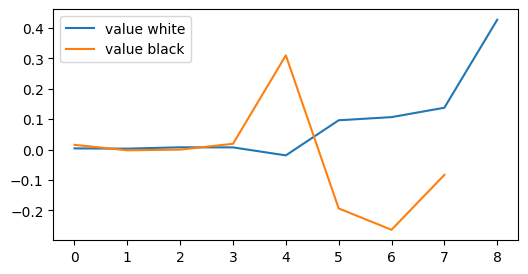

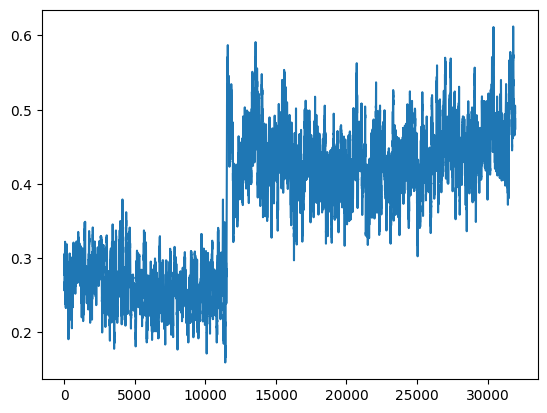

 -- 32310 -- winner: black, i: 38    wins: w = 3661, b = 3739.0, d = 13092
 -- 32320 -- winner: white, i: 35    wins: w = 3665, b = 3745.0, d = 13098
 -- 32330 -- winner: white, i: 81    wins: w = 3672, b = 3748.0, d = 13108
 -- 32340 -- winner: black, i: 86    wins: w = 3677, b = 3753.0, d = 13112
 -- 32350 -- winner: black, i: 50    wins: w = 3683, b = 3757.0, d = 13123


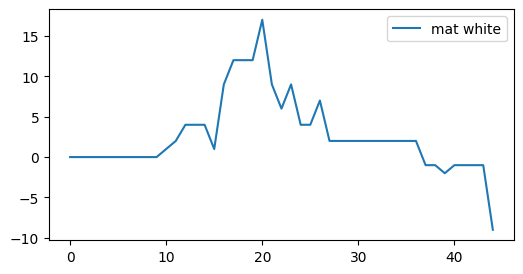

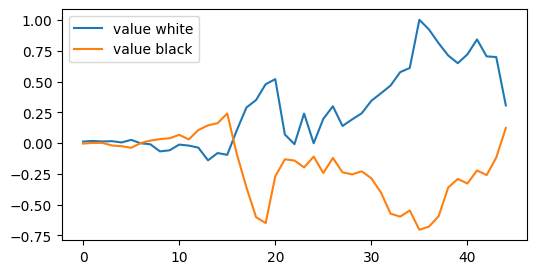

 -- 32360 -- winner: white, i: 63    wins: w = 3686, b = 3764.0, d = 13135
 -- 32370 -- winner: white, i: 99    wins: w = 3692, b = 3768.0, d = 13151
 -- 32380 -- winner: white, i: 33    wins: w = 3697, b = 3773.0, d = 13162
 -- 32390 -- winner: black, i: 82    wins: w = 3704, b = 3776.0, d = 13174
 -- 32400 -- winner: black, i: 106    wins: w = 3710, b = 3780.0, d = 13185


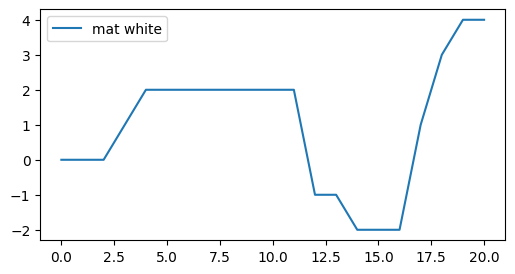

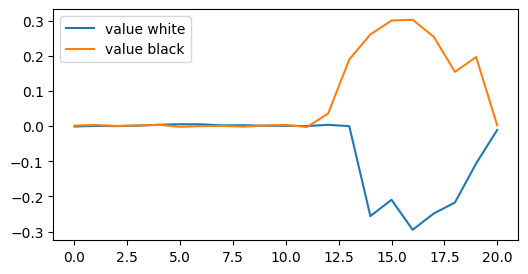

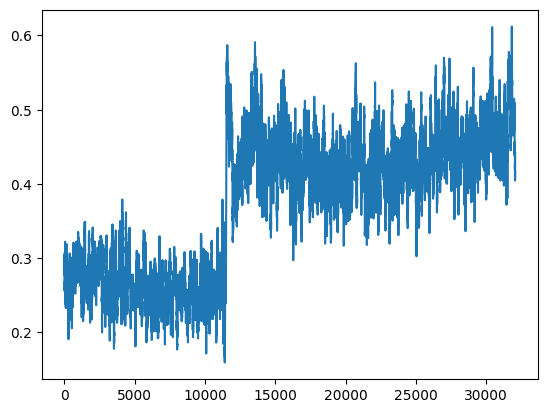

 -- 32410 -- winner: black, i: 76    wins: w = 3713, b = 3787.0, d = 13201
 -- 32420 -- winner: black, i: 72    wins: w = 3717, b = 3793.0, d = 13223
 -- 32430 -- winner: black, i: 86    wins: w = 3719, b = 3801.0, d = 13236
 -- 32440 -- winner: white, i: 107    wins: w = 3725, b = 3805.0, d = 13250
 -- 32450 -- winner: black, i: 66    wins: w = 3729, b = 3811.0, d = 13259


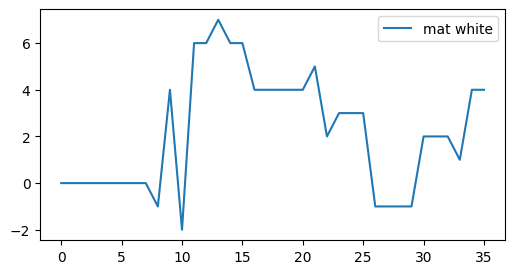

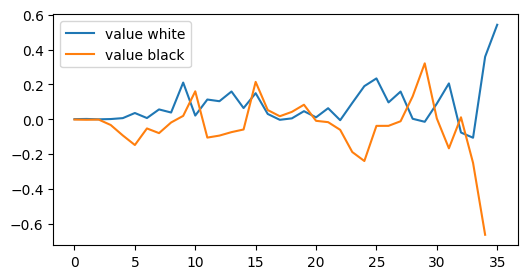

 -- 32460 -- winner: white, i: 83    wins: w = 3737, b = 3813.0, d = 13278
 -- 32470 -- winner: white, i: 89    wins: w = 3742, b = 3818.0, d = 13290
 -- 32480 -- winner: black, i: 98    wins: w = 3747, b = 3823.0, d = 13306
 -- 32490 -- winner: white, i: 45    wins: w = 3755, b = 3825.0, d = 13322
 -- 32500 -- winner: white, i: 75    wins: w = 3762, b = 3828.0, d = 13335


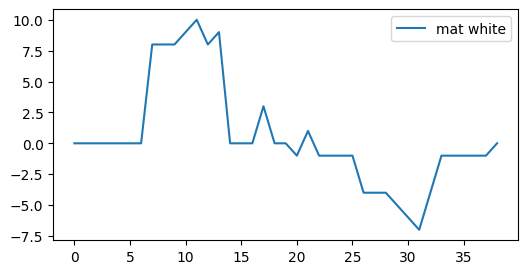

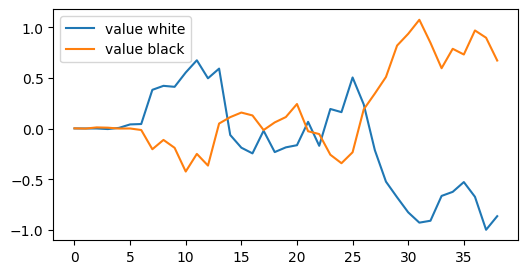

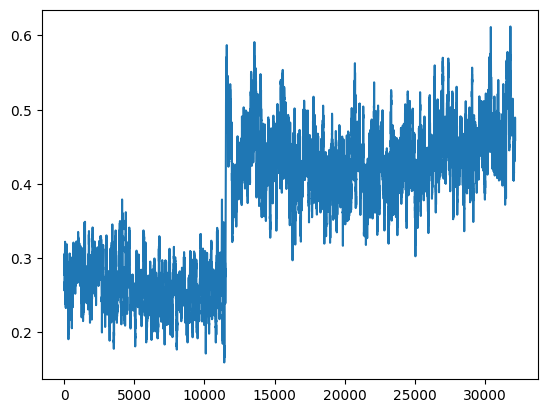

 -- 32510 -- winner: white, i: 137    wins: w = 3768, b = 3832.0, d = 13351
 -- 32520 -- winner: white, i: 93    wins: w = 3776, b = 3834.0, d = 13367
 -- 32530 -- winner: black, i: 118    wins: w = 3782, b = 3838.0, d = 13371
 -- 32540 -- winner: white, i: 89    wins: w = 3789, b = 3841.0, d = 13379
 -- 32550 -- winner: black, i: 70    wins: w = 3794, b = 3846.0, d = 13396


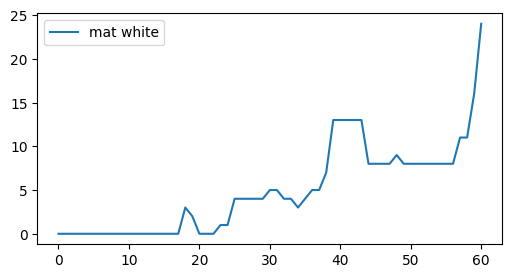

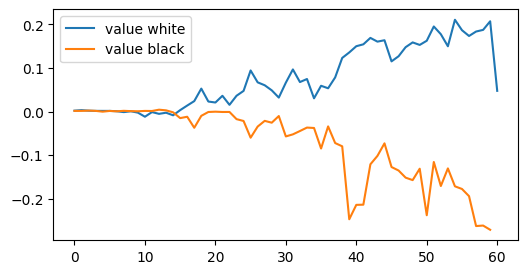

 -- 32560 -- winner: black, i: 78    wins: w = 3799, b = 3851.0, d = 13410
 -- 32570 -- winner: black, i: 60    wins: w = 3804, b = 3856.0, d = 13420
 -- 32580 -- winner: white, i: 21    wins: w = 3811, b = 3859.0, d = 13431
 -- 32590 -- winner: white, i: 67    wins: w = 3818, b = 3862.0, d = 13439
 -- 32600 -- winner: white, i: 103    wins: w = 3822, b = 3868.0, d = 13451


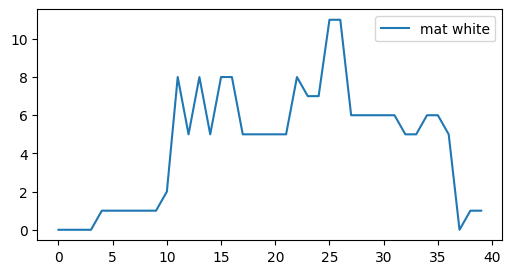

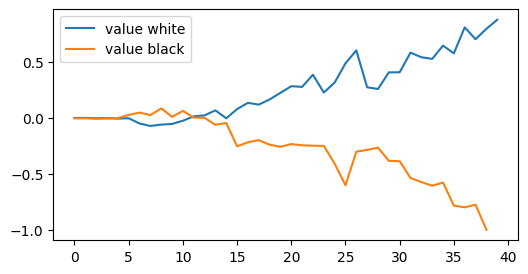

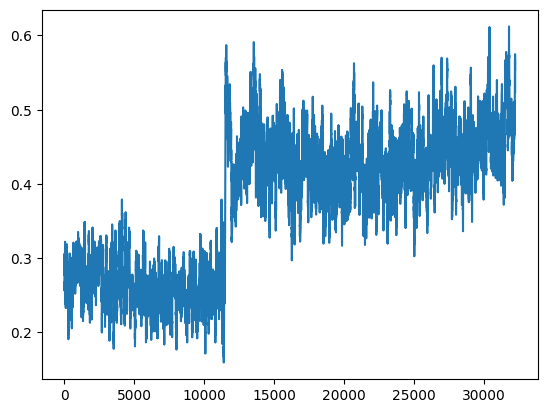

 -- 32610 -- winner: white, i: 17    wins: w = 3829, b = 3871.0, d = 13477
 -- 32620 -- winner: white, i: 97    wins: w = 3834, b = 3876.0, d = 13482
 -- 32630 -- winner: white, i: 87    wins: w = 3839, b = 3881.0, d = 13490
 -- 32640 -- winner: white, i: 103    wins: w = 3847, b = 3883.0, d = 13506
 -- 32650 -- winner: white, i: 63    wins: w = 3853, b = 3887.0, d = 13508


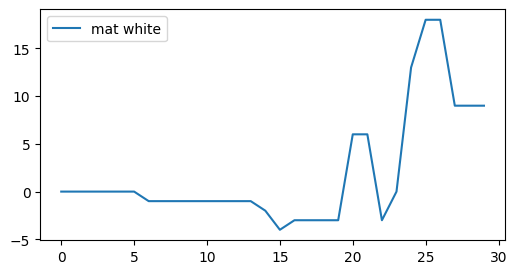

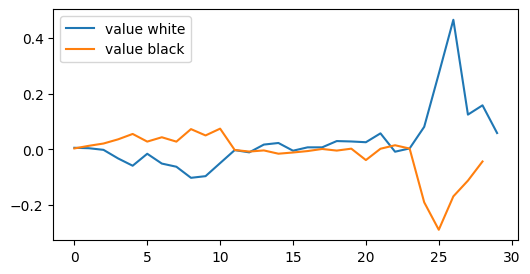

 -- 32660 -- winner: white, i: 79    wins: w = 3859, b = 3891.0, d = 13522
 -- 32670 -- winner: black, i: 90    wins: w = 3863, b = 3897.0, d = 13541
 -- 32680 -- winner: white, i: 93    wins: w = 3869, b = 3901.0, d = 13551
 -- 32690 -- winner: black, i: 70    wins: w = 3872, b = 3908.0, d = 13558
 -- 32700 -- winner: black, i: 62    wins: w = 3876, b = 3914.0, d = 13569


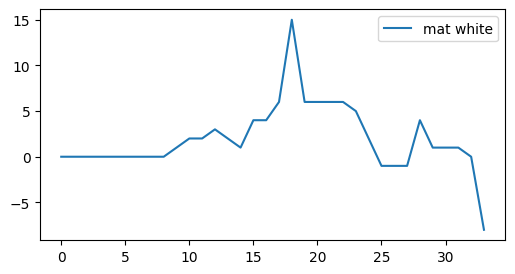

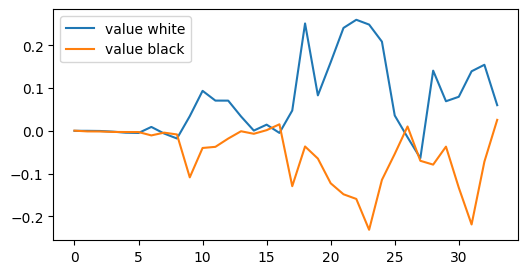

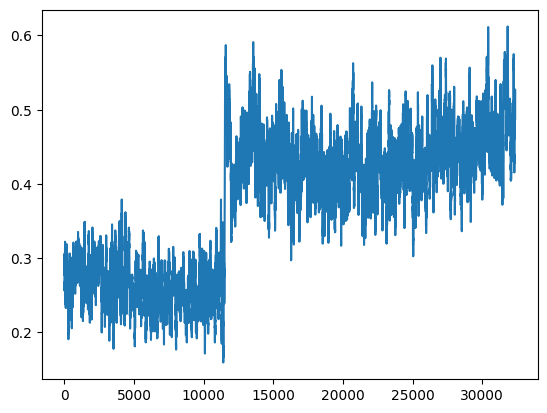

 -- 32710 -- winner: white, i: 27    wins: w = 3881, b = 3919.0, d = 13582
 -- 32720 -- winner: black, i: 26    wins: w = 3887, b = 3923.0, d = 13599
 -- 32730 -- winner: black, i: 100    wins: w = 3894, b = 3926.0, d = 13610
 -- 32740 -- winner: white, i: 81    wins: w = 3901, b = 3929.0, d = 13635
 -- 32750 -- winner: white, i: 45    wins: w = 3905, b = 3935.0, d = 13648


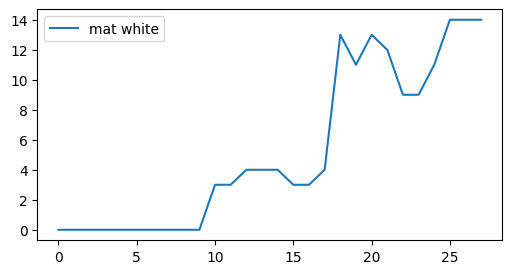

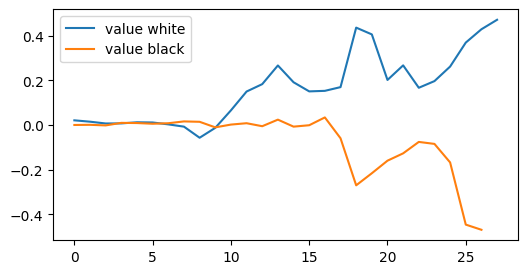

 -- 32760 -- winner: white, i: 9    wins: w = 3914, b = 3936.0, d = 13667
 -- 32770 -- winner: black, i: 12    wins: w = 3919, b = 3941.0, d = 13675
 -- 32780 -- winner: white, i: 23    wins: w = 3926, b = 3944.0, d = 13689
 -- 32790 -- winner: black, i: 46    wins: w = 3932, b = 3948.0, d = 13708
 -- 32800 -- winner: white, i: 87    wins: w = 3937, b = 3953.0, d = 13718


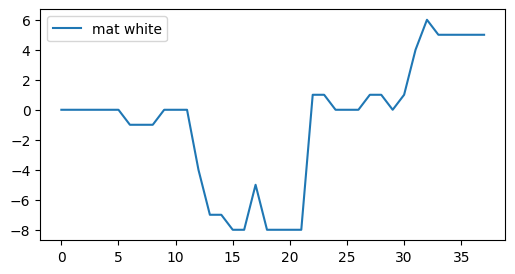

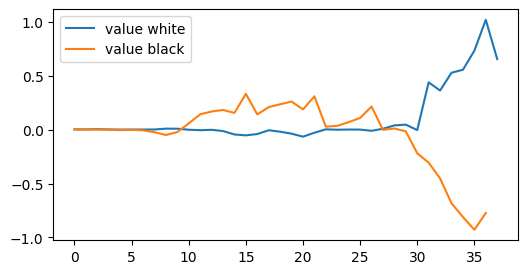

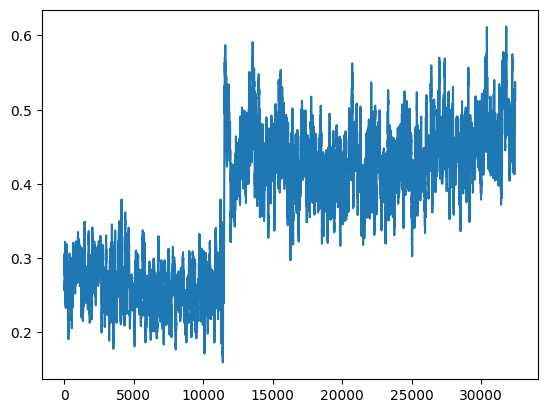

 -- 32810 -- winner: white, i: 49    wins: w = 3942, b = 3958.0, d = 13727
 -- 32820 -- winner: white, i: 149    wins: w = 3949, b = 3961.0, d = 13732
 -- 32830 -- winner: black, i: 86    wins: w = 3955, b = 3965.0, d = 13748
 -- 32840 -- winner: white, i: 69    wins: w = 3959, b = 3971.0, d = 13764
 -- 32850 -- winner: black, i: 18    wins: w = 3963, b = 3977.0, d = 13772


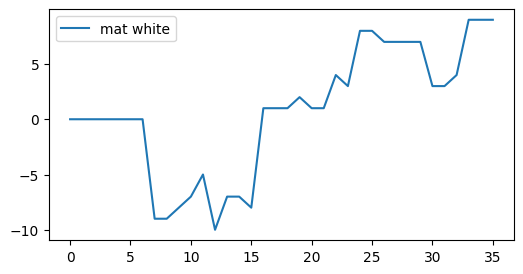

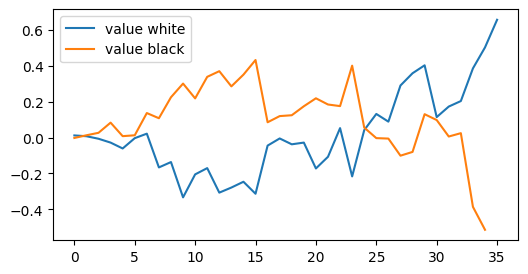

 -- 32860 -- winner: white, i: 69    wins: w = 3969, b = 3981.0, d = 13788
 -- 32870 -- winner: white, i: 89    wins: w = 3974, b = 3986.0, d = 13807
 -- 32880 -- winner: white, i: 131    wins: w = 3981, b = 3989.0, d = 13821
 -- 32890 -- winner: white, i: 71    wins: w = 3987, b = 3993.0, d = 13839
 -- 32900 -- winner: white, i: 75    wins: w = 3994, b = 3996.0, d = 13861


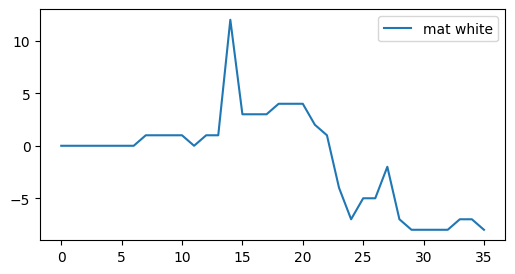

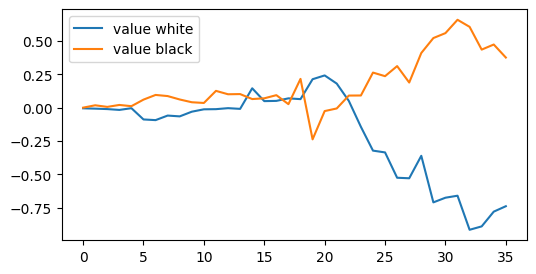

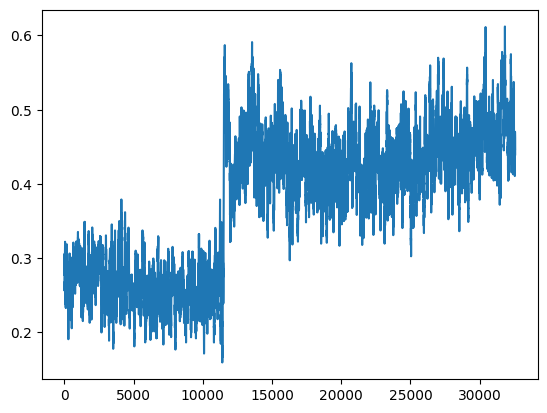

 -- 32910 -- winner: black, i: 84    wins: w = 3999, b = 4001.0, d = 13879
 -- 32920 -- winner: black, i: 98    wins: w = 4002, b = 4008.0, d = 13897
 -- 32930 -- winner: black, i: 34    wins: w = 4007, b = 4013.0, d = 13907
 -- 32940 -- winner: white, i: 83    wins: w = 4012, b = 4018.0, d = 13919
 -- 32950 -- winner: white, i: 99    wins: w = 4015, b = 4025.0, d = 13927


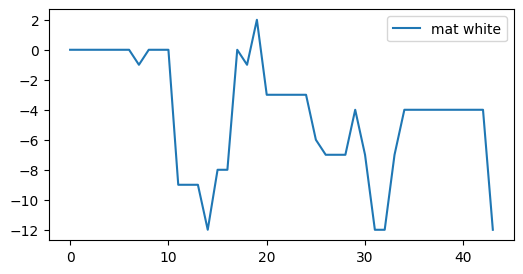

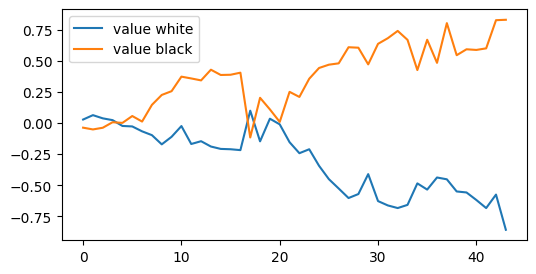

 -- 32960 -- winner: white, i: 95    wins: w = 4022, b = 4028.0, d = 13939
 -- 32970 -- winner: white, i: 17    wins: w = 4028, b = 4032.0, d = 13968
 -- 32980 -- winner: black, i: 102    wins: w = 4030, b = 4040.0, d = 13978
 -- 32990 -- winner: white, i: 65    wins: w = 4034, b = 4046.0, d = 13990
 -- 33000 -- winner: white, i: 19    wins: w = 4039, b = 4051.0, d = 14007


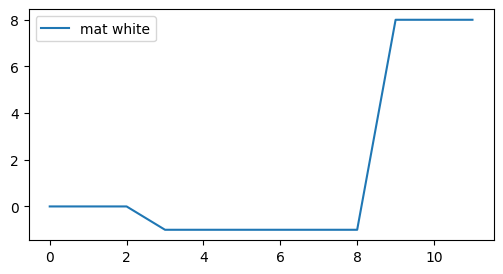

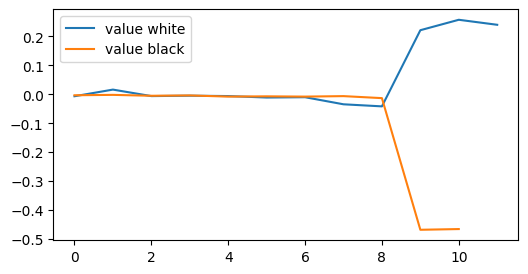

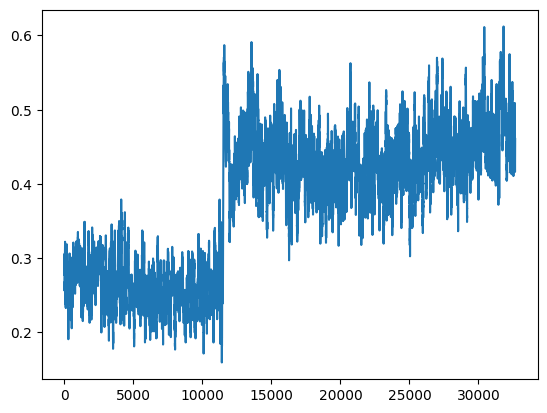

 -- 33010 -- winner: white, i: 69    wins: w = 4044, b = 4056.0, d = 14020
 -- 33020 -- winner: black, i: 34    wins: w = 4047, b = 4063.0, d = 14035
 -- 33030 -- winner: white, i: 55    wins: w = 4053, b = 4067.0, d = 14044
 -- 33040 -- winner: white, i: 59    wins: w = 4063, b = 4067.0, d = 14056
 -- 33050 -- winner: white, i: 127    wins: w = 4067, b = 4073.0, d = 14069


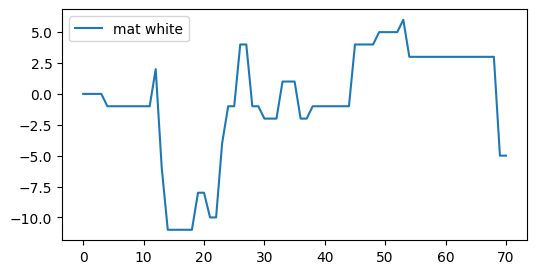

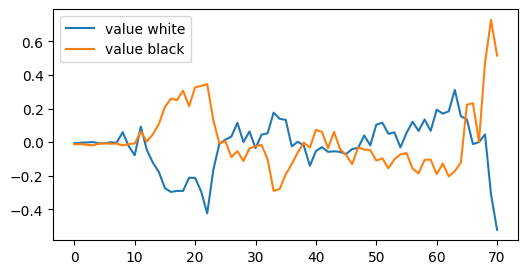

 -- 33060 -- winner: black, i: 64    wins: w = 4073, b = 4077.0, d = 14078
 -- 33070 -- winner: black, i: 42    wins: w = 4081, b = 4079.0, d = 14092
 -- 33080 -- winner: white, i: 65    wins: w = 4085, b = 4085.0, d = 14107
 -- 33090 -- winner: white, i: 67    wins: w = 4089, b = 4091.0, d = 14131
 -- 33100 -- winner: black, i: 74    wins: w = 4091, b = 4099.0, d = 14139


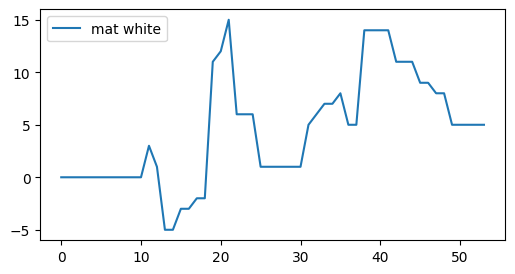

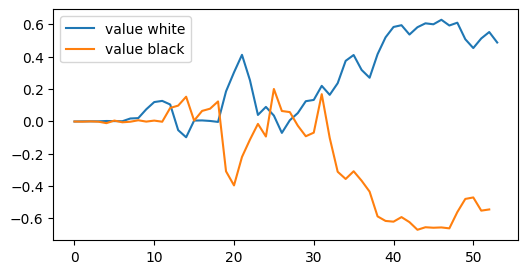

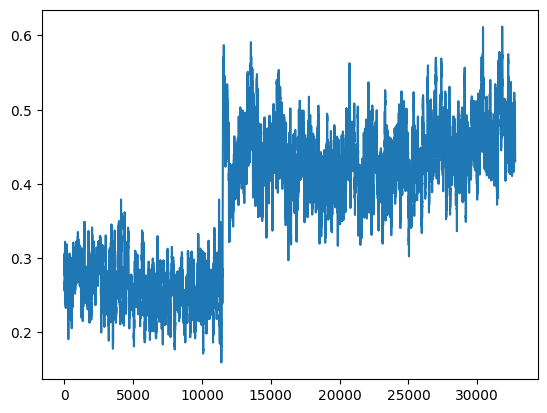

 -- 33110 -- winner: white, i: 57    wins: w = 4097, b = 4103.0, d = 14156
 -- 33120 -- winner: black, i: 56    wins: w = 4104, b = 4106.0, d = 14169
 -- 33130 -- winner: white, i: 109    wins: w = 4112, b = 4108.0, d = 14179
 -- 33140 -- winner: black, i: 86    wins: w = 4117, b = 4113.0, d = 14195
 -- 33150 -- winner: black, i: 36    wins: w = 4121, b = 4119.0, d = 14207


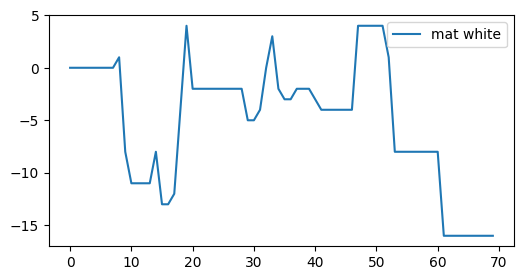

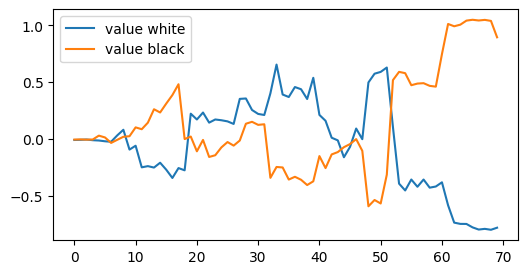

 -- 33160 -- winner: black, i: 76    wins: w = 4125, b = 4125.0, d = 14225
 -- 33170 -- winner: white, i: 11    wins: w = 4131, b = 4129.0, d = 14231
 -- 33180 -- winner: black, i: 70    wins: w = 4135, b = 4135.0, d = 14246
 -- 33190 -- winner: black, i: 70    wins: w = 4140, b = 4140.0, d = 14254
 -- 33200 -- winner: black, i: 18    wins: w = 4142, b = 4148.0, d = 14266


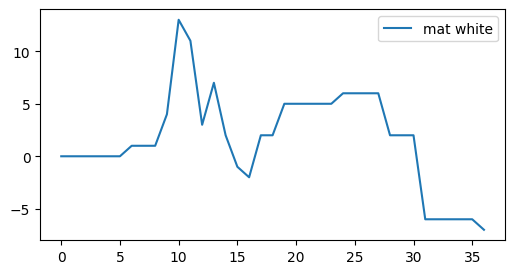

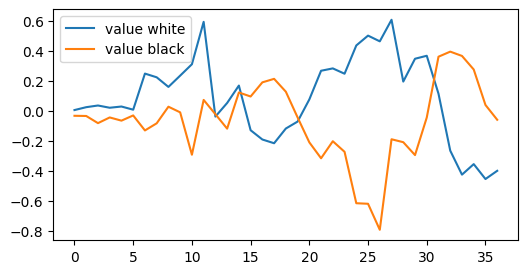

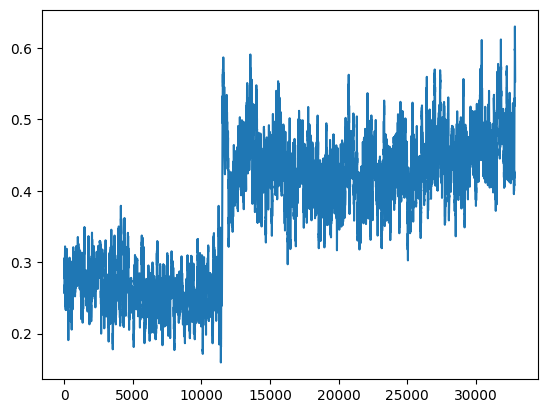

 -- 33210 -- winner: black, i: 102    wins: w = 4148, b = 4152.0, d = 14283
 -- 33220 -- winner: white, i: 83    wins: w = 4153, b = 4157.0, d = 14291
 -- 33230 -- winner: white, i: 67    wins: w = 4159, b = 4161.0, d = 14306
 -- 33240 -- winner: white, i: 43    wins: w = 4163, b = 4167.0, d = 14326
 -- 33250 -- winner: white, i: 69    wins: w = 4167, b = 4173.0, d = 14346


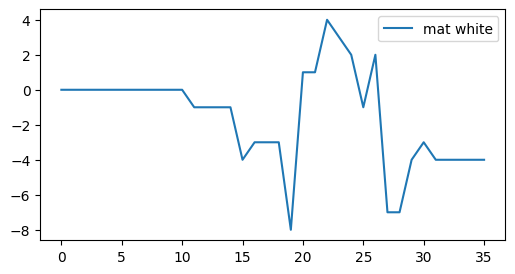

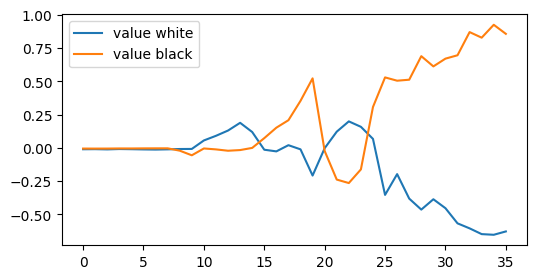

 -- 33260 -- winner: black, i: 82    wins: w = 4169, b = 4181.0, d = 14351
 -- 33270 -- winner: black, i: 76    wins: w = 4174, b = 4186.0, d = 14358
 -- 33280 -- winner: black, i: 50    wins: w = 4179, b = 4191.0, d = 14365
 -- 33290 -- winner: white, i: 47    wins: w = 4186, b = 4194.0, d = 14381
 -- 33300 -- winner: black, i: 52    wins: w = 4191, b = 4199.0, d = 14399


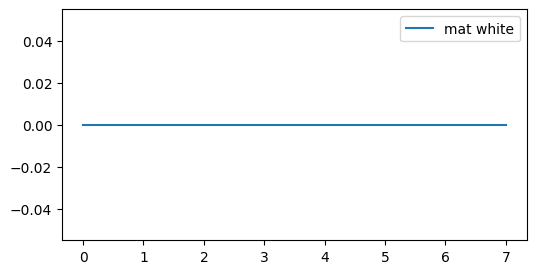

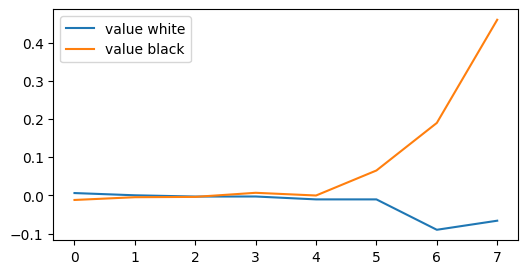

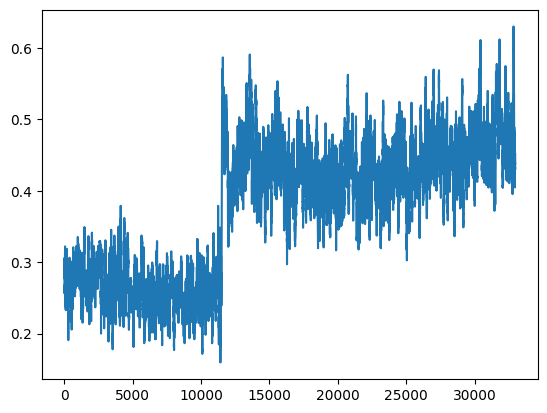

 -- 33310 -- winner: black, i: 84    wins: w = 4194, b = 4206.0, d = 14406
 -- 33320 -- winner: black, i: 48    wins: w = 4200, b = 4210.0, d = 14419
 -- 33330 -- winner: white, i: 83    wins: w = 4206, b = 4214.0, d = 14435
 -- 33340 -- winner: white, i: 113    wins: w = 4211, b = 4219.0, d = 14445
 -- 33350 -- winner: black, i: 52    wins: w = 4216, b = 4224.0, d = 14459


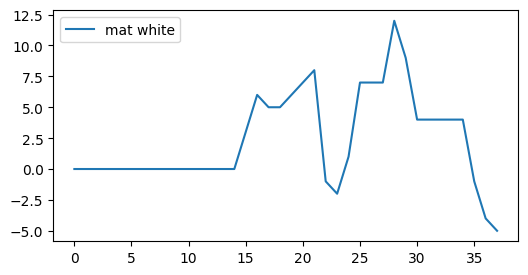

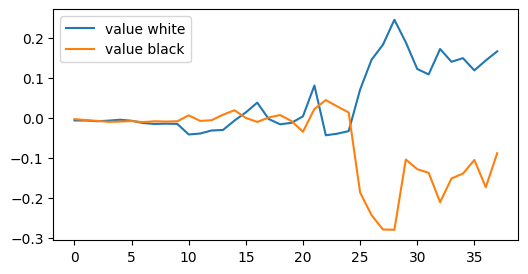

 -- 33360 -- winner: white, i: 103    wins: w = 4220, b = 4230.0, d = 14477
 -- 33370 -- winner: white, i: 47    wins: w = 4226, b = 4234.0, d = 14493
 -- 33380 -- winner: white, i: 43    wins: w = 4230, b = 4240.0, d = 14510
 -- 33390 -- winner: black, i: 140    wins: w = 4235, b = 4245.0, d = 14530
 -- 33400 -- winner: white, i: 109    wins: w = 4243, b = 4247.0, d = 14548


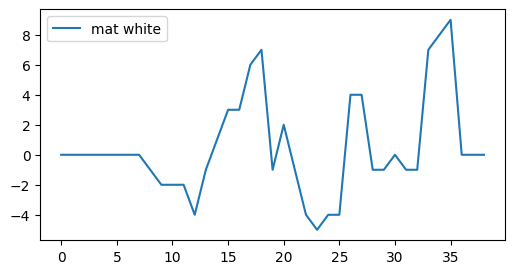

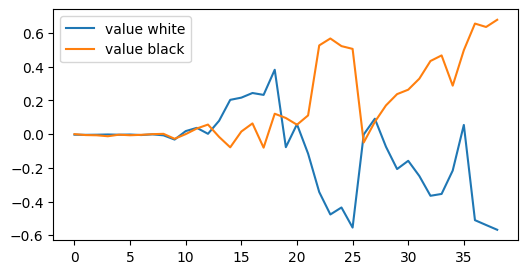

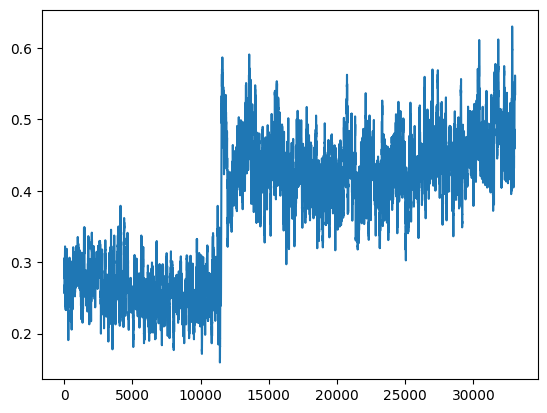

 -- 33410 -- winner: white, i: 161    wins: w = 4247, b = 4253.0, d = 14559
 -- 33420 -- winner: white, i: 93    wins: w = 4253, b = 4257.0, d = 14569
 -- 33430 -- winner: black, i: 100    wins: w = 4258, b = 4262.0, d = 14585
 -- 33440 -- winner: black, i: 76    wins: w = 4262, b = 4268.0, d = 14597
 -- 33450 -- winner: white, i: 77    wins: w = 4267, b = 4273.0, d = 14626


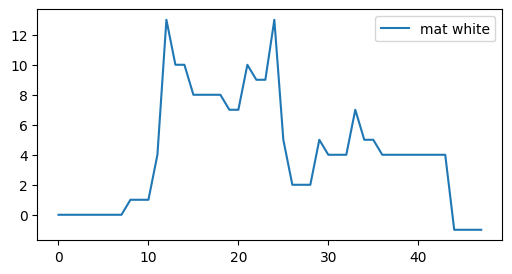

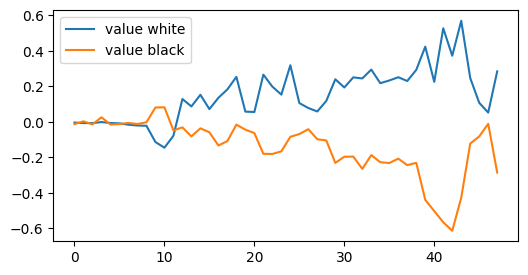

 -- 33460 -- winner: white, i: 115    wins: w = 4276, b = 4274.0, d = 14645
 -- 33470 -- winner: white, i: 83    wins: w = 4281, b = 4279.0, d = 14662
 -- 33480 -- winner: black, i: 60    wins: w = 4288, b = 4282.0, d = 14680
 -- 33490 -- winner: white, i: 99    wins: w = 4293, b = 4287.0, d = 14693
 -- 33500 -- winner: black, i: 82    wins: w = 4300, b = 4290.0, d = 14710


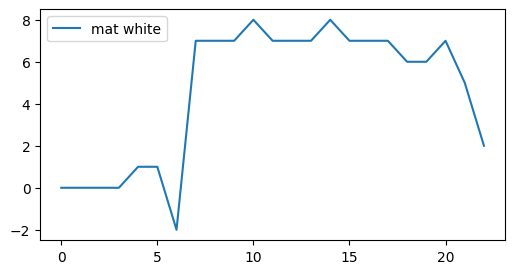

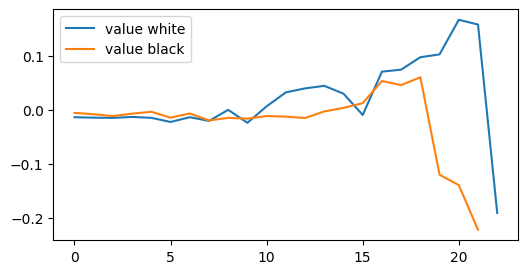

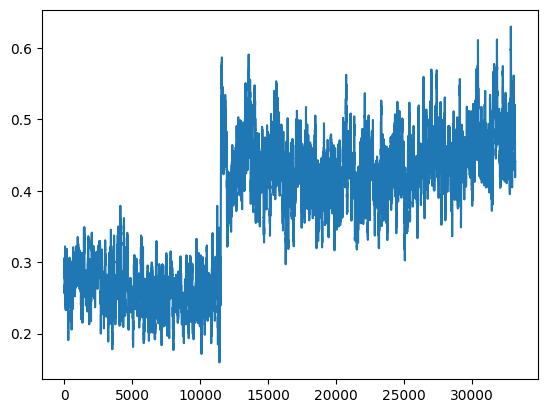

 -- 33510 -- winner: black, i: 82    wins: w = 4303, b = 4297.0, d = 14718
 -- 33520 -- winner: black, i: 98    wins: w = 4308, b = 4302.0, d = 14733
 -- 33530 -- winner: black, i: 90    wins: w = 4312, b = 4308.0, d = 14740
 -- 33540 -- winner: white, i: 73    wins: w = 4318, b = 4312.0, d = 14745
 -- 33550 -- winner: white, i: 97    wins: w = 4323, b = 4317.0, d = 14773


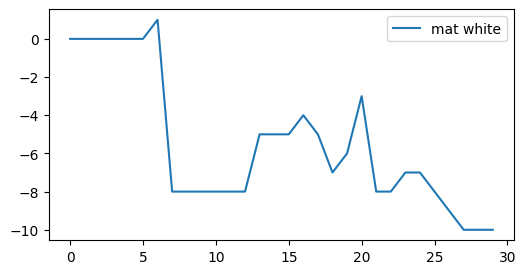

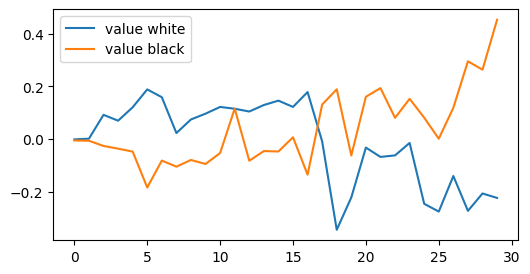

 -- 33560 -- winner: black, i: 70    wins: w = 4329, b = 4321.0, d = 14782
 -- 33570 -- winner: black, i: 10    wins: w = 4335, b = 4325.0, d = 14790
 -- 33580 -- winner: white, i: 105    wins: w = 4340, b = 4330.0, d = 14801
 -- 33590 -- winner: black, i: 60    wins: w = 4345, b = 4335.0, d = 14815
 -- 33600 -- winner: white, i: 173    wins: w = 4349, b = 4341.0, d = 14825


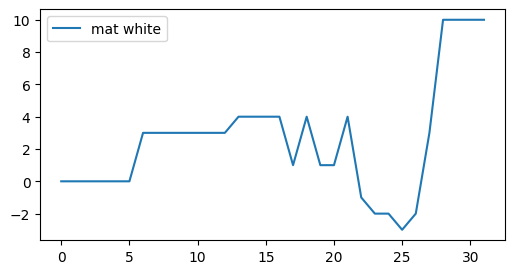

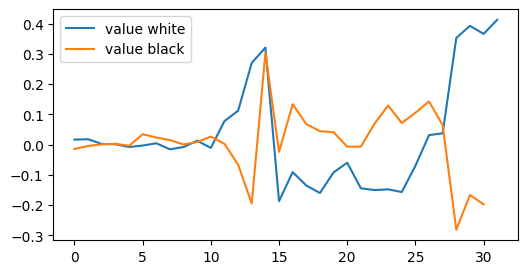

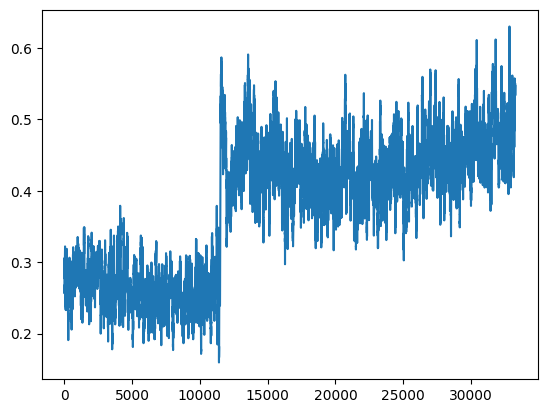

 -- 33610 -- winner: black, i: 32    wins: w = 4350, b = 4350.0, d = 14844
 -- 33620 -- winner: black, i: 62    wins: w = 4357, b = 4353.0, d = 14857
 -- 33630 -- winner: white, i: 39    wins: w = 4365, b = 4355.0, d = 14877
 -- 33640 -- winner: white, i: 57    wins: w = 4371, b = 4359.0, d = 14895
 -- 33650 -- winner: black, i: 104    wins: w = 4376, b = 4364.0, d = 14910


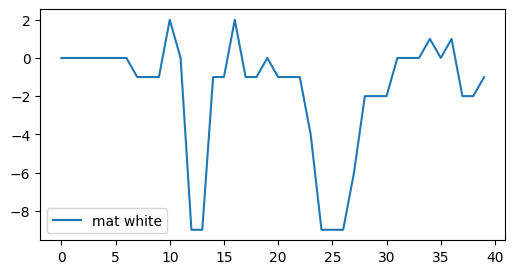

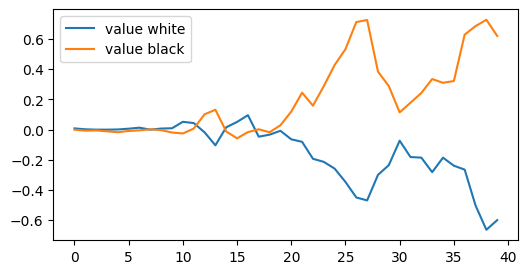

 -- 33660 -- winner: black, i: 134    wins: w = 4380, b = 4370.0, d = 14931
 -- 33670 -- winner: white, i: 13    wins: w = 4384, b = 4376.0, d = 14953
 -- 33680 -- winner: black, i: 82    wins: w = 4389, b = 4381.0, d = 14974
 -- 33690 -- winner: black, i: 104    wins: w = 4395, b = 4385.0, d = 14985
 -- 33700 -- winner: white, i: 103    wins: w = 4404, b = 4386.0, d = 14998


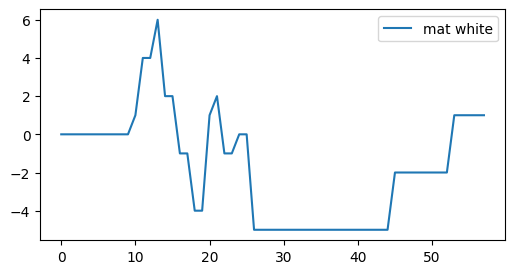

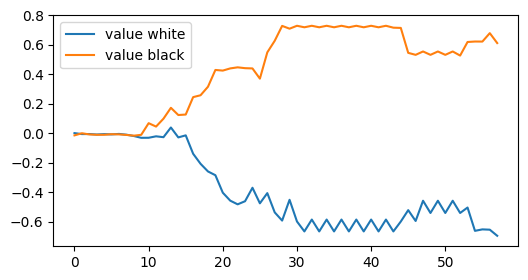

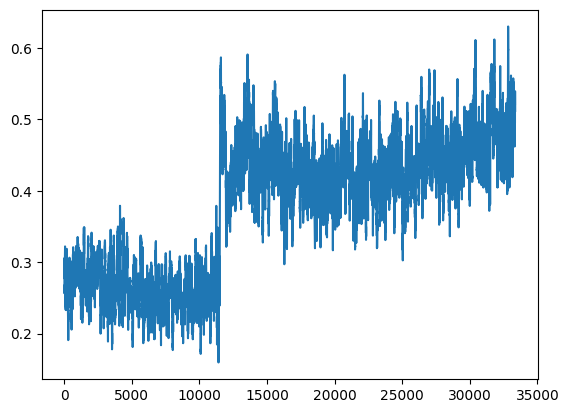

 -- 33710 -- winner: black, i: 28    wins: w = 4409, b = 4391.0, d = 15008
 -- 33720 -- winner: white, i: 85    wins: w = 4414, b = 4396.0, d = 15018
 -- 33730 -- winner: white, i: 83    wins: w = 4421, b = 4399.0, d = 15039
 -- 33740 -- winner: black, i: 92    wins: w = 4425, b = 4405.0, d = 15056
 -- 33750 -- winner: white, i: 81    wins: w = 4432, b = 4408.0, d = 15069


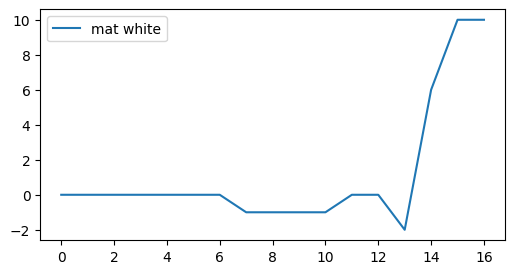

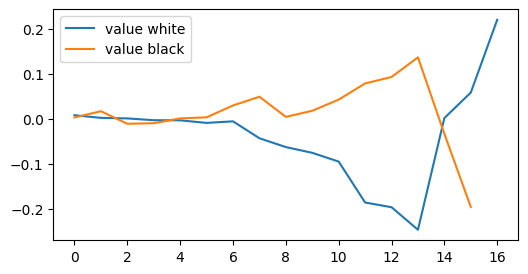

 -- 33760 -- winner: black, i: 50    wins: w = 4439, b = 4411.0, d = 15089
 -- 33770 -- winner: white, i: 41    wins: w = 4448, b = 4412.0, d = 15101
 -- 33780 -- winner: white, i: 65    wins: w = 4454, b = 4416.0, d = 15118
 -- 33790 -- winner: white, i: 11    wins: w = 4458, b = 4422.0, d = 15142
 -- 33800 -- winner: white, i: 39    wins: w = 4463, b = 4427.0, d = 15149


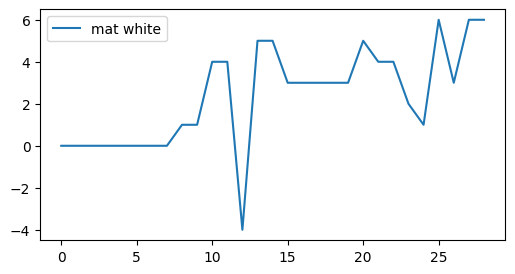

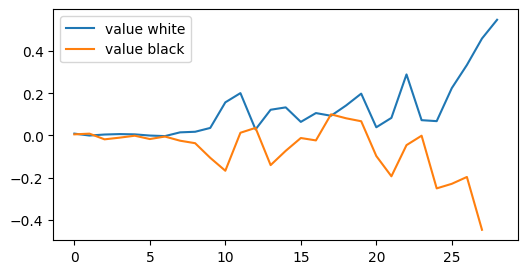

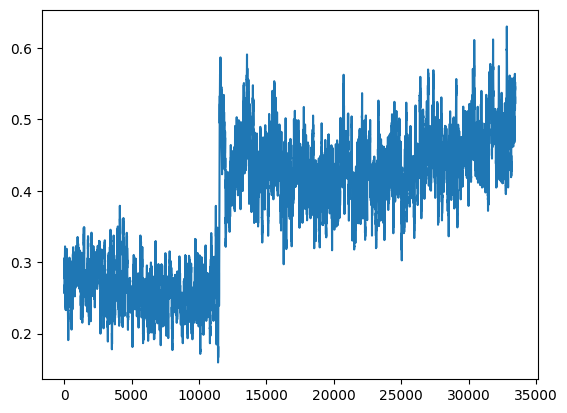

 -- 33810 -- winner: white, i: 75    wins: w = 4468, b = 4432.0, d = 15164
 -- 33820 -- winner: black, i: 46    wins: w = 4473, b = 4437.0, d = 15181
 -- 33830 -- winner: black, i: 68    wins: w = 4477, b = 4443.0, d = 15194
 -- 33840 -- winner: white, i: 19    wins: w = 4483, b = 4447.0, d = 15208
 -- 33850 -- winner: black, i: 82    wins: w = 4490, b = 4450.0, d = 15221


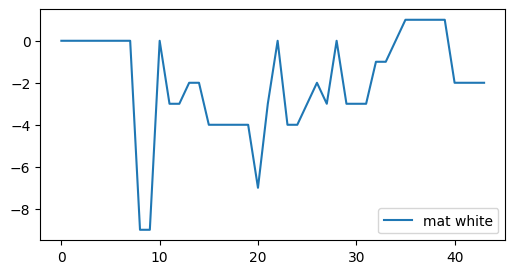

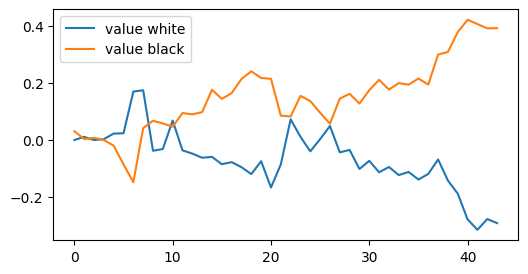

 -- 33860 -- winner: black, i: 78    wins: w = 4495, b = 4455.0, d = 15236
 -- 33870 -- winner: black, i: 114    wins: w = 4497, b = 4463.0, d = 15251
 -- 33880 -- winner: white, i: 63    wins: w = 4504, b = 4466.0, d = 15268
 -- 33890 -- winner: black, i: 8    wins: w = 4507, b = 4473.0, d = 15286
 -- 33900 -- winner: white, i: 59    wins: w = 4514, b = 4476.0, d = 15306


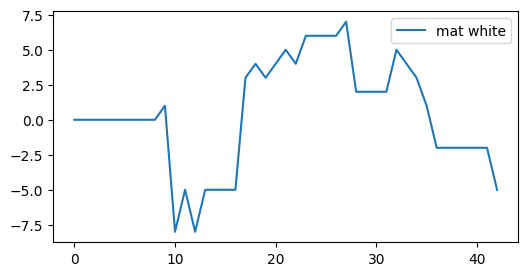

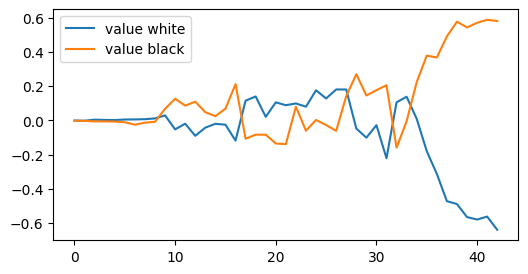

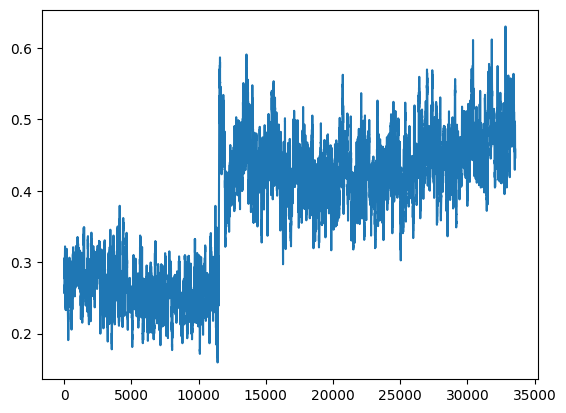

 -- 33910 -- winner: white, i: 73    wins: w = 4519, b = 4481.0, d = 15314
 -- 33920 -- winner: white, i: 11    wins: w = 4525, b = 4485.0, d = 15320
 -- 33930 -- winner: black, i: 8    wins: w = 4528, b = 4492.0, d = 15328
 -- 33940 -- winner: white, i: 93    wins: w = 4534, b = 4496.0, d = 15337
 -- 33950 -- winner: black, i: 168    wins: w = 4537, b = 4503.0, d = 15348


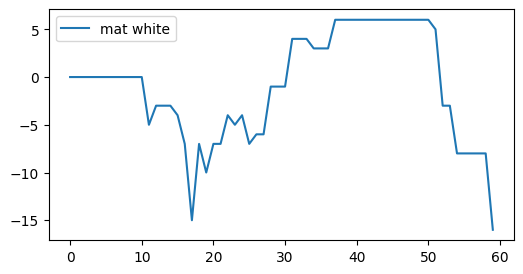

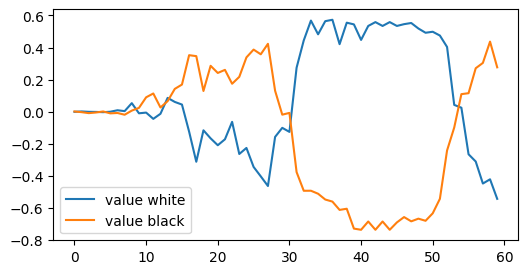

 -- 33960 -- winner: white, i: 141    wins: w = 4543, b = 4507.0, d = 15356
 -- 33970 -- winner: black, i: 80    wins: w = 4549, b = 4511.0, d = 15389
 -- 33980 -- winner: black, i: 76    wins: w = 4552, b = 4518.0, d = 15405
 -- 33990 -- winner: white, i: 87    wins: w = 4557, b = 4523.0, d = 15419
 -- 34000 -- winner: white, i: 61    wins: w = 4564, b = 4526.0, d = 15442


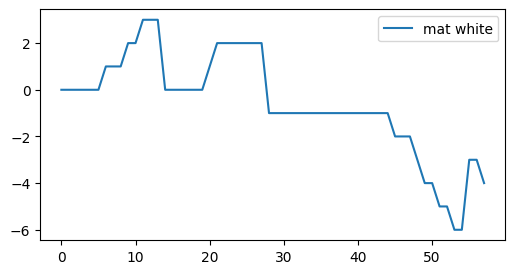

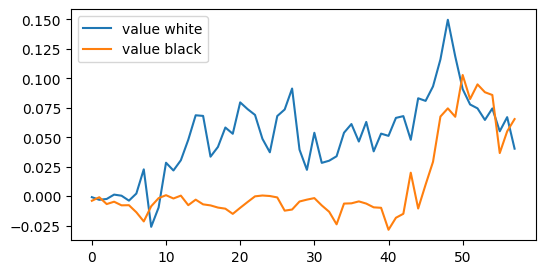

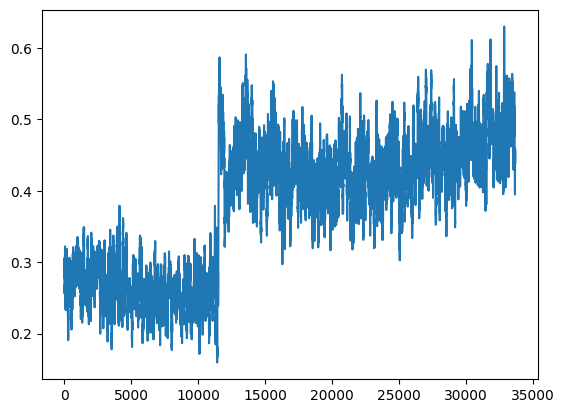

 -- 34010 -- winner: black, i: 194    wins: w = 4569, b = 4531.0, d = 15448
 -- 34020 -- winner: black, i: 112    wins: w = 4572, b = 4538.0, d = 15462
 -- 34030 -- winner: black, i: 44    wins: w = 4577, b = 4543.0, d = 15476
 -- 34040 -- winner: black, i: 84    wins: w = 4582, b = 4548.0, d = 15496
 -- 34050 -- winner: black, i: 48    wins: w = 4588, b = 4552.0, d = 15507


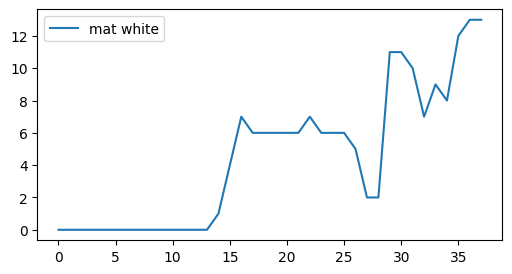

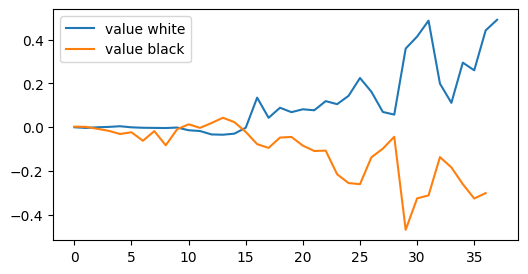

 -- 34060 -- winner: black, i: 124    wins: w = 4595, b = 4555.0, d = 15525
 -- 34070 -- winner: black, i: 10    wins: w = 4600, b = 4560.0, d = 15547
 -- 34080 -- winner: black, i: 90    wins: w = 4604, b = 4566.0, d = 15560
 -- 34090 -- winner: black, i: 14    wins: w = 4606, b = 4574.0, d = 15568
 -- 34100 -- winner: black, i: 18    wins: w = 4611, b = 4579.0, d = 15604


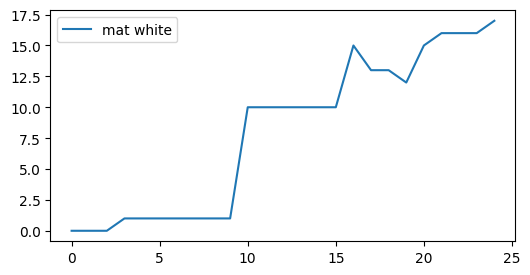

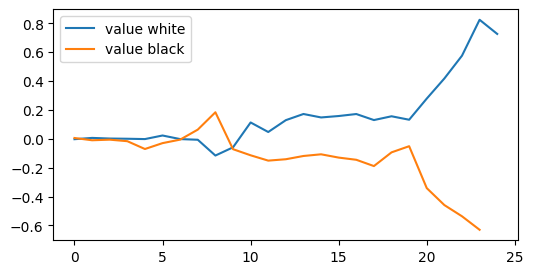

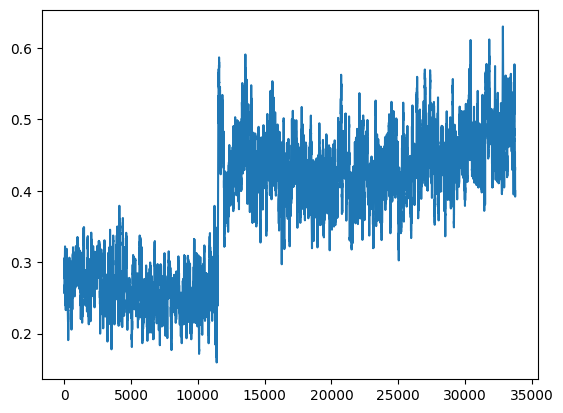

 -- 34110 -- winner: white, i: 119    wins: w = 4616, b = 4584.0, d = 15615
 -- 34120 -- winner: black, i: 110    wins: w = 4621, b = 4589.0, d = 15630
 -- 34130 -- winner: black, i: 116    wins: w = 4624, b = 4596.0, d = 15642
 -- 34140 -- winner: white, i: 39    wins: w = 4627, b = 4603.0, d = 15655
 -- 34150 -- winner: black, i: 62    wins: w = 4635, b = 4605.0, d = 15676


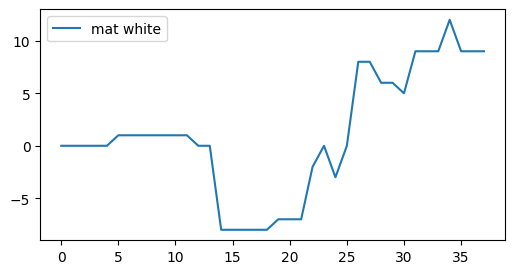

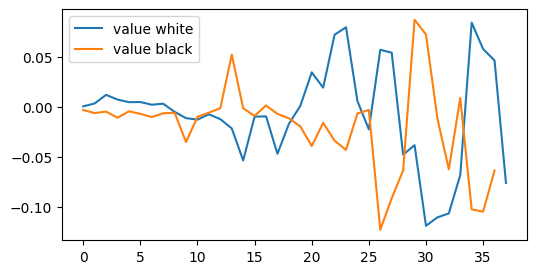

 -- 34160 -- winner: white, i: 61    wins: w = 4642, b = 4608.0, d = 15694
 -- 34170 -- winner: black, i: 86    wins: w = 4644, b = 4616.0, d = 15713
 -- 34180 -- winner: black, i: 38    wins: w = 4650, b = 4620.0, d = 15725
 -- 34190 -- winner: black, i: 62    wins: w = 4656, b = 4624.0, d = 15744
 -- 34200 -- winner: black, i: 72    wins: w = 4662, b = 4628.0, d = 15762


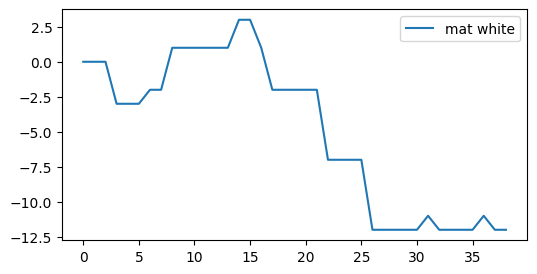

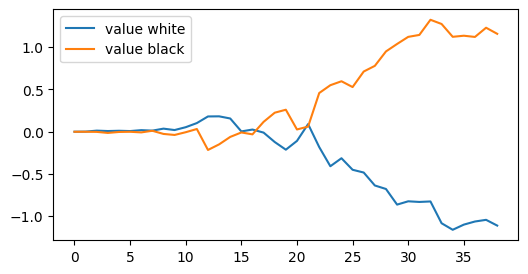

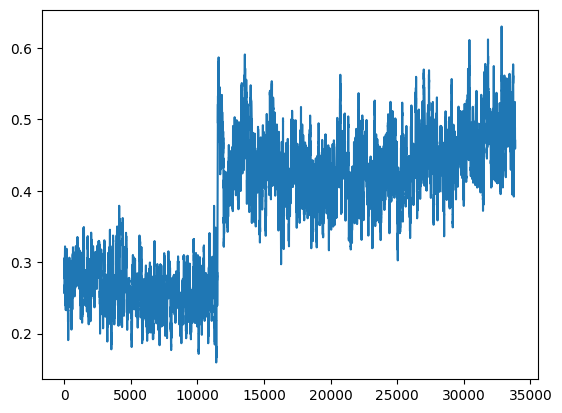

 -- 34210 -- winner: black, i: 102    wins: w = 4665, b = 4635.0, d = 15787
 -- 34220 -- winner: white, i: 53    wins: w = 4671, b = 4639.0, d = 15794
 -- 34230 -- winner: black, i: 10    wins: w = 4676, b = 4644.0, d = 15809
 -- 34240 -- winner: white, i: 65    wins: w = 4680, b = 4650.0, d = 15817
 -- 34250 -- winner: black, i: 44    wins: w = 4685, b = 4655.0, d = 15838


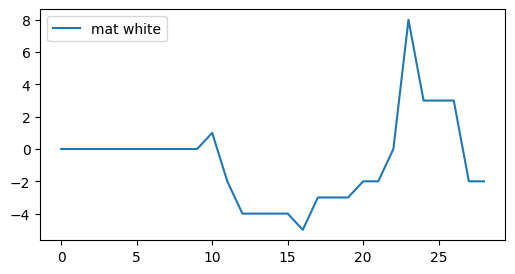

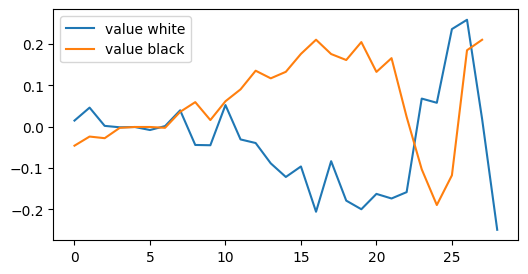

 -- 34260 -- winner: white, i: 15    wins: w = 4691, b = 4659.0, d = 15855
 -- 34270 -- winner: white, i: 97    wins: w = 4697, b = 4663.0, d = 15865
 -- 34280 -- winner: black, i: 72    wins: w = 4701, b = 4669.0, d = 15881
 -- 34290 -- winner: black, i: 118    wins: w = 4708, b = 4672.0, d = 15905
 -- 34300 -- winner: white, i: 91    wins: w = 4715, b = 4675.0, d = 15915


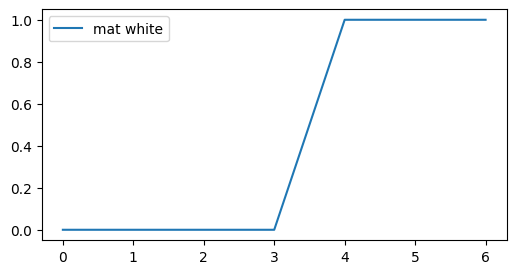

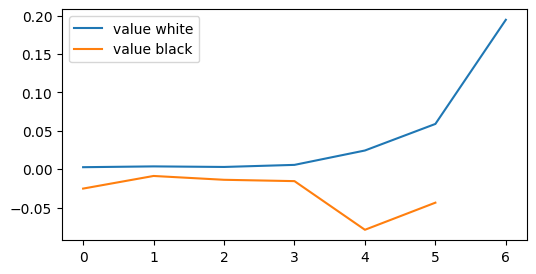

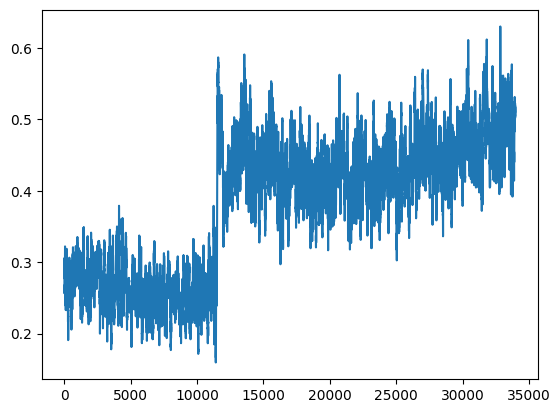

 -- 34310 -- winner: white, i: 115    wins: w = 4723, b = 4677.0, d = 15925
 -- 34320 -- winner: white, i: 11    wins: w = 4731, b = 4679.0, d = 15937
 -- 34330 -- winner: white, i: 45    wins: w = 4735, b = 4685.0, d = 15948
 -- 34340 -- winner: white, i: 129    wins: w = 4741, b = 4689.0, d = 15966
 -- 34350 -- winner: white, i: 107    wins: w = 4744, b = 4696.0, d = 15979


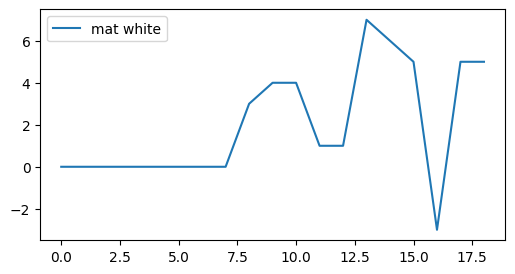

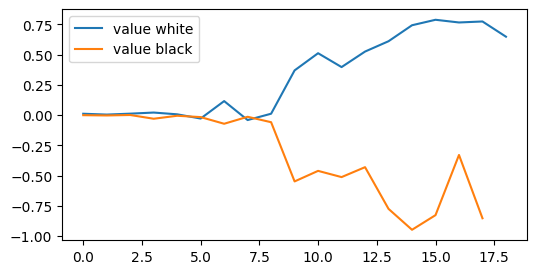

 -- 34360 -- winner: black, i: 114    wins: w = 4751, b = 4699.0, d = 16005
 -- 34370 -- winner: white, i: 75    wins: w = 4756, b = 4704.0, d = 16024
 -- 34380 -- winner: black, i: 22    wins: w = 4762, b = 4708.0, d = 16032
 -- 34390 -- winner: black, i: 70    wins: w = 4766, b = 4714.0, d = 16036
 -- 34400 -- winner: black, i: 92    wins: w = 4767, b = 4723.0, d = 16040


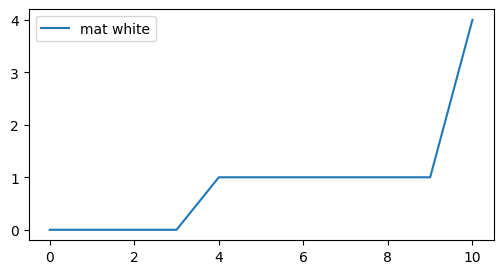

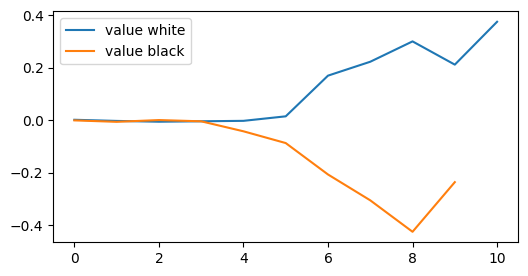

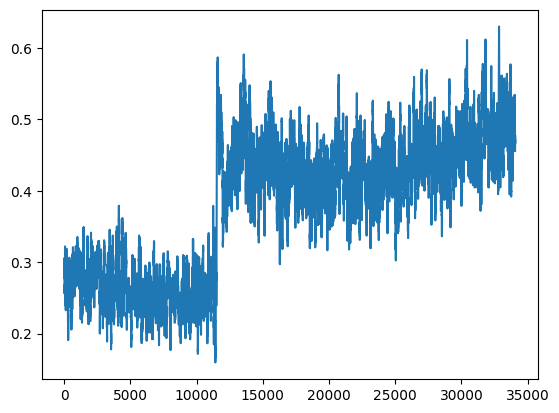

 -- 34410 -- winner: black, i: 42    wins: w = 4772, b = 4728.0, d = 16051
 -- 34420 -- winner: white, i: 23    wins: w = 4775, b = 4735.0, d = 16071
 -- 34430 -- winner: white, i: 57    wins: w = 4783, b = 4737.0, d = 16079
 -- 34440 -- winner: black, i: 6    wins: w = 4788, b = 4742.0, d = 16091
 -- 34450 -- winner: white, i: 77    wins: w = 4796, b = 4744.0, d = 16108


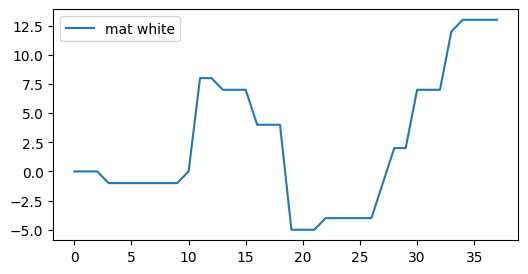

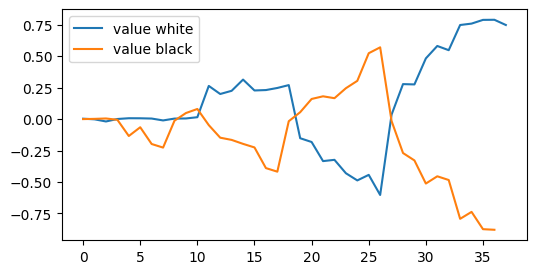

 -- 34460 -- winner: black, i: 70    wins: w = 4800, b = 4750.0, d = 16113
 -- 34470 -- winner: white, i: 45    wins: w = 4805, b = 4755.0, d = 16127
 -- 34480 -- winner: white, i: 21    wins: w = 4810, b = 4760.0, d = 16133
 -- 34490 -- winner: white, i: 59    wins: w = 4815, b = 4765.0, d = 16141
 -- 34500 -- winner: black, i: 58    wins: w = 4820, b = 4770.0, d = 16149


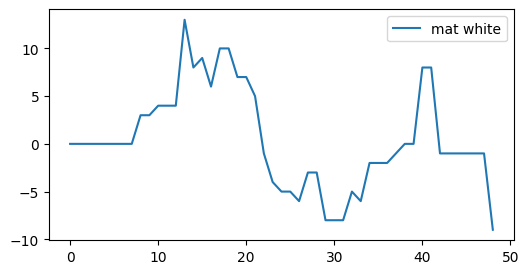

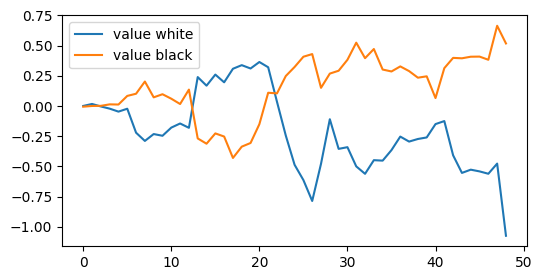

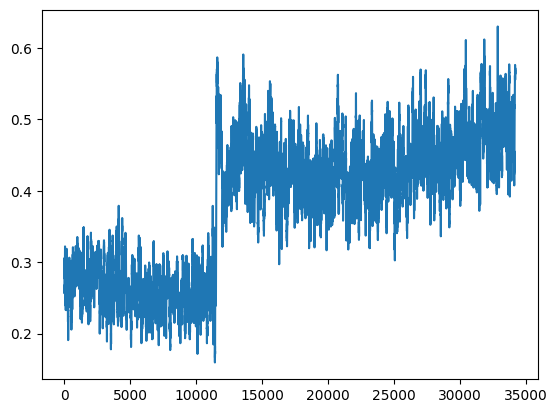

 -- 34510 -- winner: white, i: 93    wins: w = 4824, b = 4776.0, d = 16158
 -- 34520 -- winner: black, i: 88    wins: w = 4826, b = 4784.0, d = 16166
 -- 34530 -- winner: white, i: 31    wins: w = 4832, b = 4788.0, d = 16180
 -- 34540 -- winner: black, i: 84    wins: w = 4834, b = 4796.0, d = 16193
 -- 34550 -- winner: white, i: 97    wins: w = 4839, b = 4801.0, d = 16211


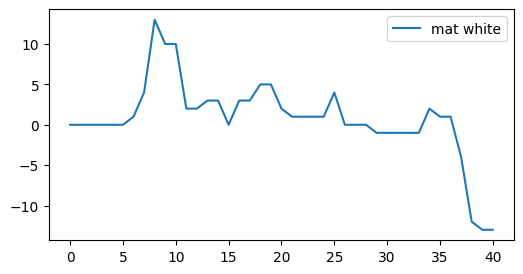

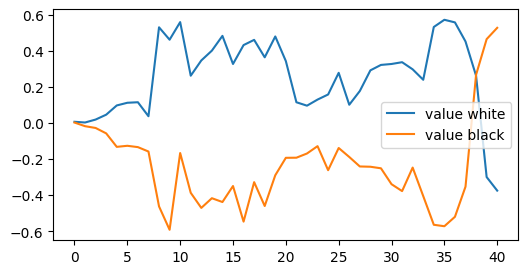

 -- 34560 -- winner: white, i: 45    wins: w = 4845, b = 4805.0, d = 16222
 -- 34570 -- winner: white, i: 81    wins: w = 4852, b = 4808.0, d = 16229
 -- 34580 -- winner: black, i: 34    wins: w = 4858, b = 4812.0, d = 16245
 -- 34590 -- winner: black, i: 32    wins: w = 4863, b = 4817.0, d = 16260
 -- 34600 -- winner: white, i: 91    wins: w = 4869, b = 4821.0, d = 16279


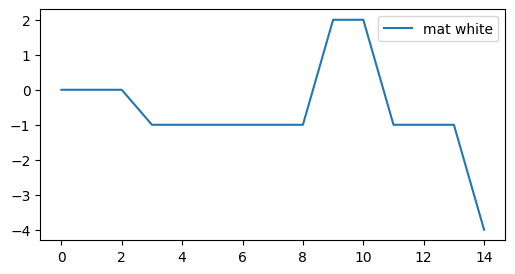

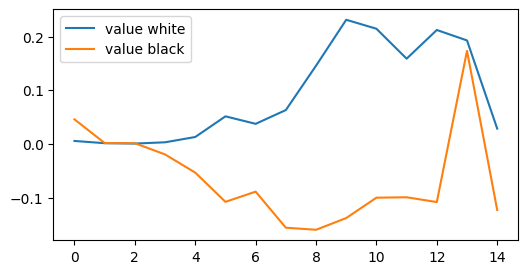

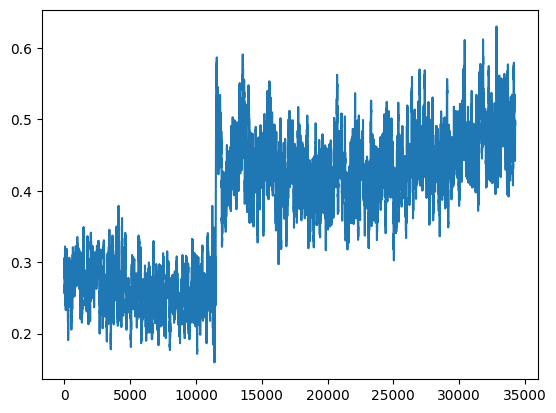

 -- 34610 -- winner: black, i: 70    wins: w = 4872, b = 4828.0, d = 16288
 -- 34620 -- winner: black, i: 160    wins: w = 4878, b = 4832.0, d = 16293
 -- 34630 -- winner: white, i: 15    wins: w = 4883, b = 4837.0, d = 16314
 -- 34640 -- winner: white, i: 65    wins: w = 4889, b = 4841.0, d = 16333
 -- 34650 -- winner: black, i: 80    wins: w = 4893, b = 4847.0, d = 16348


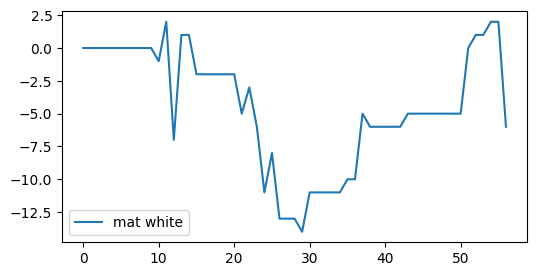

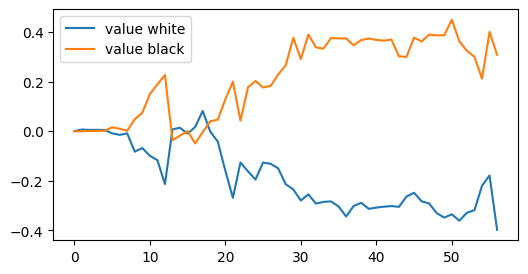

 -- 34660 -- winner: black, i: 6    wins: w = 4896, b = 4854.0, d = 16354
 -- 34670 -- winner: white, i: 103    wins: w = 4899, b = 4861.0, d = 16369
 -- 34680 -- winner: white, i: 101    wins: w = 4902, b = 4868.0, d = 16379
 -- 34690 -- winner: white, i: 25    wins: w = 4910, b = 4870.0, d = 16393
 -- 34700 -- winner: black, i: 92    wins: w = 4916, b = 4874.0, d = 16415


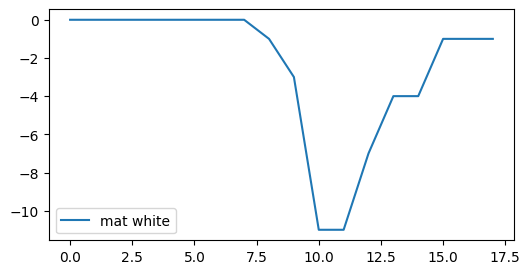

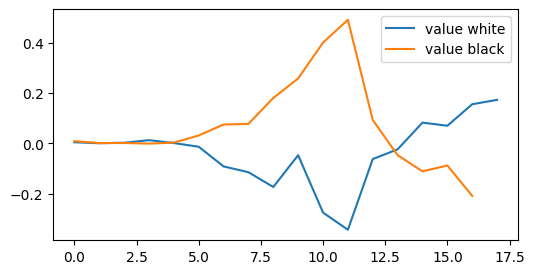

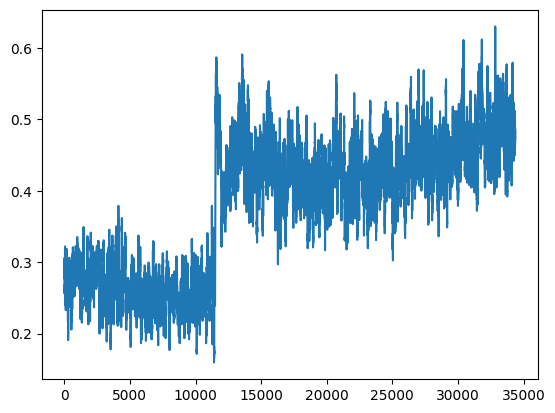

 -- 34710 -- winner: black, i: 112    wins: w = 4922, b = 4878.0, d = 16423
 -- 34720 -- winner: white, i: 75    wins: w = 4929, b = 4881.0, d = 16433
 -- 34730 -- winner: white, i: 47    wins: w = 4934, b = 4886.0, d = 16448
 -- 34740 -- winner: white, i: 97    wins: w = 4936, b = 4894.0, d = 16460
 -- 34750 -- winner: black, i: 82    wins: w = 4941, b = 4899.0, d = 16488


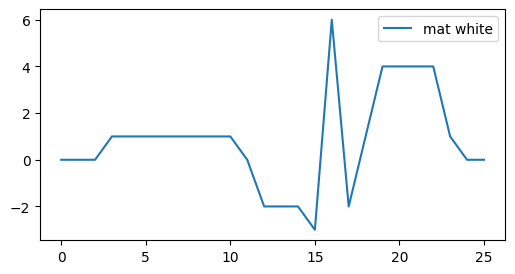

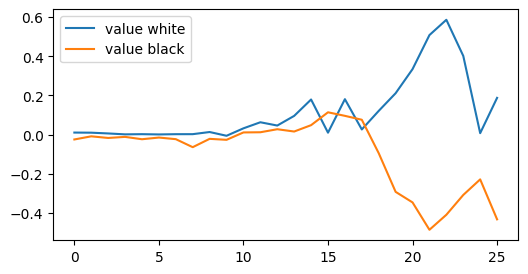

 -- 34760 -- winner: white, i: 39    wins: w = 4945, b = 4905.0, d = 16496
 -- 34770 -- winner: white, i: 31    wins: w = 4951, b = 4909.0, d = 16515
 -- 34780 -- winner: black, i: 48    wins: w = 4957, b = 4913.0, d = 16533
 -- 34790 -- winner: black, i: 72    wins: w = 4959, b = 4921.0, d = 16546
 -- 34800 -- winner: black, i: 74    wins: w = 4963, b = 4927.0, d = 16568


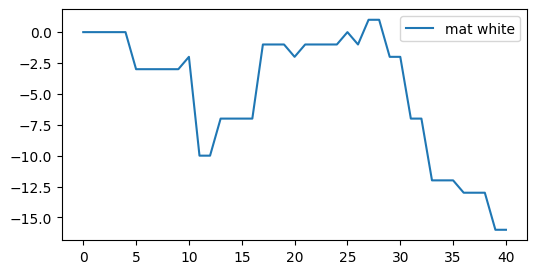

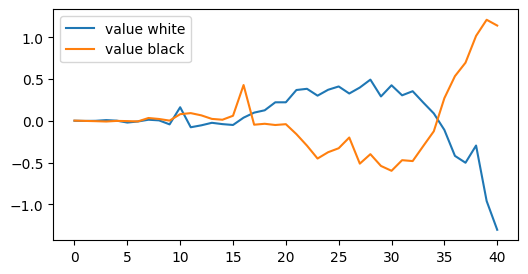

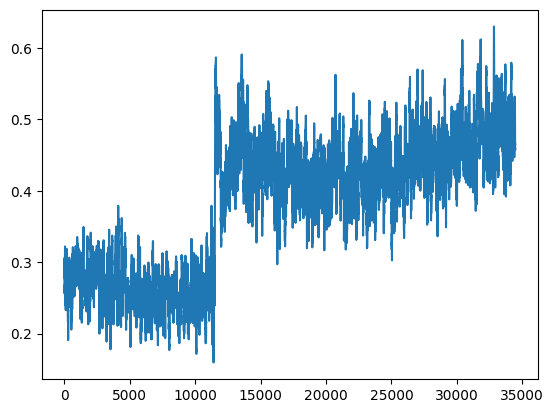

 -- 34810 -- winner: black, i: 12    wins: w = 4968, b = 4932.0, d = 16579
 -- 34820 -- winner: white, i: 45    wins: w = 4971, b = 4939.0, d = 16588
 -- 34830 -- winner: white, i: 131    wins: w = 4976, b = 4944.0, d = 16593
 -- 34840 -- winner: white, i: 103    wins: w = 4981, b = 4949.0, d = 16605
 -- 34850 -- winner: black, i: 16    wins: w = 4985, b = 4955.0, d = 16612


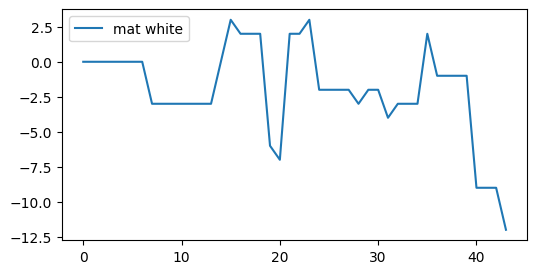

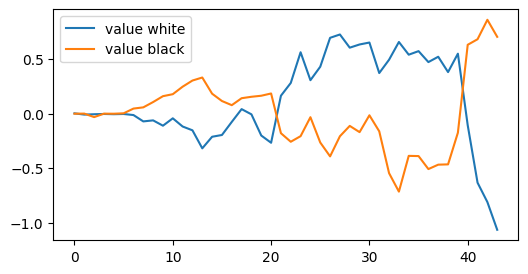

 -- 34860 -- winner: white, i: 33    wins: w = 4989, b = 4961.0, d = 16622
 -- 34870 -- winner: black, i: 30    wins: w = 4991, b = 4969.0, d = 16632
 -- 34880 -- winner: white, i: 83    wins: w = 4996, b = 4974.0, d = 16640
 -- 34890 -- winner: white, i: 41    wins: w = 5001, b = 4979.0, d = 16653
 -- 34900 -- winner: black, i: 56    wins: w = 5005, b = 4985.0, d = 16661


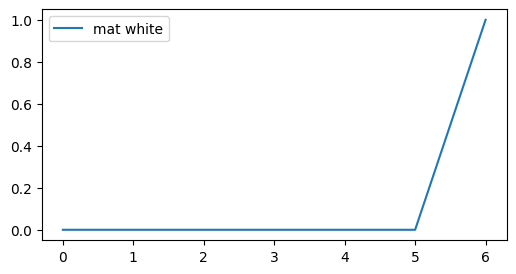

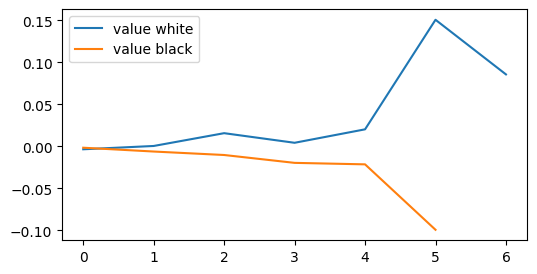

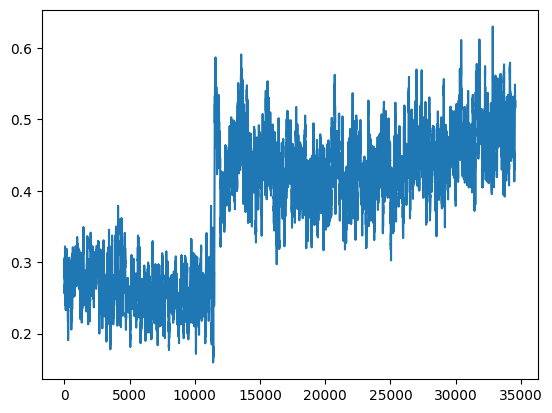

 -- 34910 -- winner: black, i: 86    wins: w = 5011, b = 4989.0, d = 16674
 -- 34920 -- winner: white, i: 65    wins: w = 5017, b = 4993.0, d = 16690
 -- 34930 -- winner: white, i: 13    wins: w = 5022, b = 4998.0, d = 16705
 -- 34940 -- winner: black, i: 40    wins: w = 5027, b = 5003.0, d = 16708
 -- 34950 -- winner: white, i: 91    wins: w = 5035, b = 5005.0, d = 16727


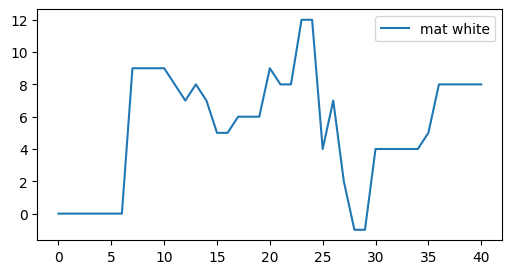

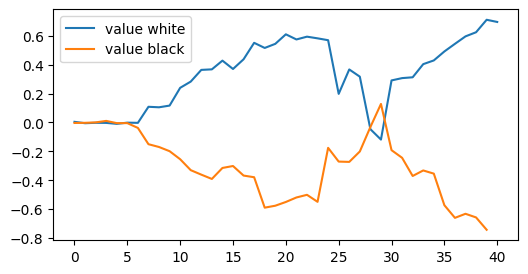

 -- 34960 -- winner: black, i: 118    wins: w = 5042, b = 5008.0, d = 16741
 -- 34970 -- winner: black, i: 26    wins: w = 5044, b = 5016.0, d = 16752
 -- 34980 -- winner: black, i: 46    wins: w = 5049, b = 5021.0, d = 16769
 -- 34990 -- winner: white, i: 59    wins: w = 5053, b = 5027.0, d = 16789
 -- 35000 -- winner: white, i: 69    wins: w = 5057, b = 5033.0, d = 16803


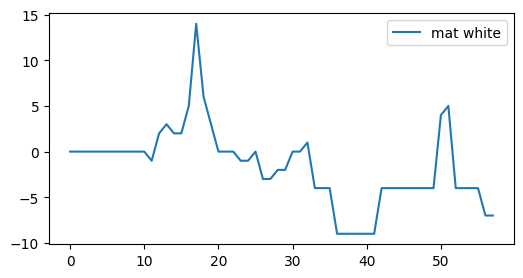

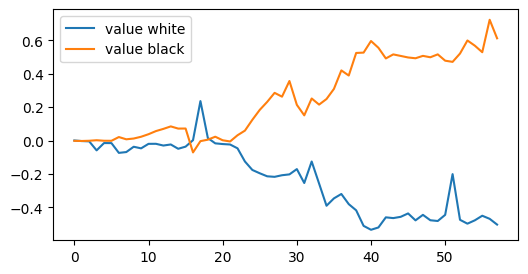

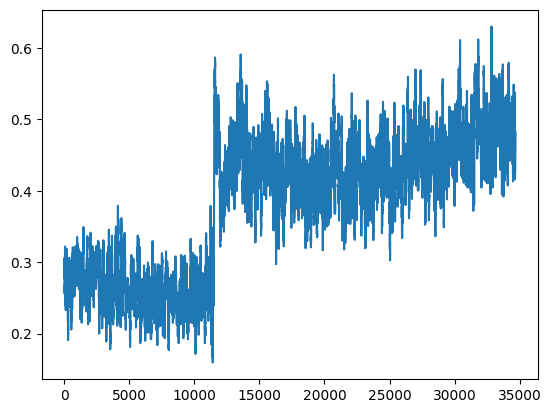

 -- 35010 -- winner: black, i: 50    wins: w = 5064, b = 5036.0, d = 16820
 -- 35020 -- winner: black, i: 70    wins: w = 5069, b = 5041.0, d = 16830
 -- 35030 -- winner: black, i: 66    wins: w = 5072, b = 5048.0, d = 16837
 -- 35040 -- winner: black, i: 74    wins: w = 5077, b = 5053.0, d = 16844
 -- 35050 -- winner: white, i: 17    wins: w = 5081, b = 5059.0, d = 16855


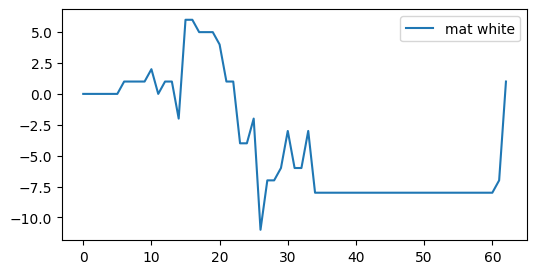

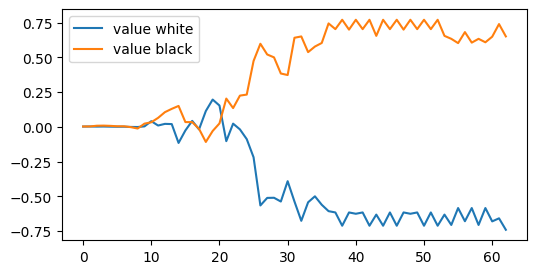

 -- 35060 -- winner: white, i: 105    wins: w = 5087, b = 5063.0, d = 16864
 -- 35070 -- winner: white, i: 7    wins: w = 5093, b = 5067.0, d = 16882
 -- 35080 -- winner: white, i: 23    wins: w = 5098, b = 5072.0, d = 16899
 -- 35090 -- winner: black, i: 132    wins: w = 5104, b = 5076.0, d = 16909
 -- 35100 -- winner: black, i: 118    wins: w = 5110, b = 5080.0, d = 16929


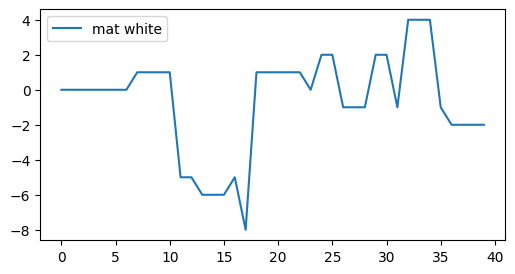

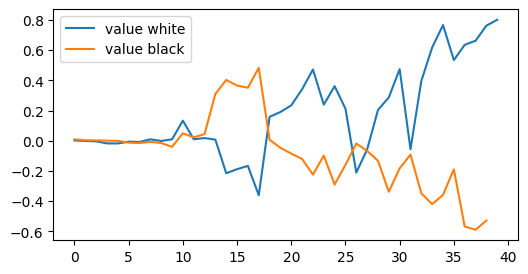

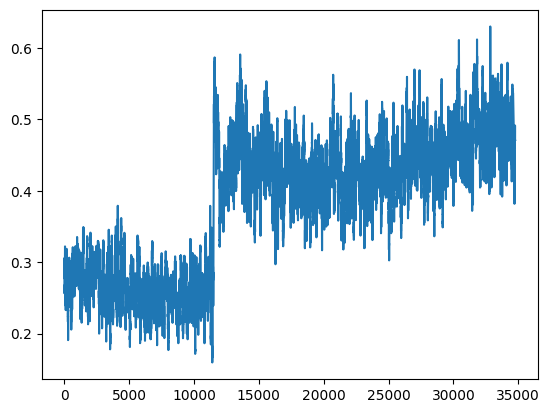

 -- 35110 -- winner: black, i: 82    wins: w = 5115, b = 5085.0, d = 16946
 -- 35120 -- winner: white, i: 63    wins: w = 5120, b = 5090.0, d = 16958
 -- 35130 -- winner: black, i: 30    wins: w = 5124, b = 5096.0, d = 16970
 -- 35140 -- winner: white, i: 83    wins: w = 5127, b = 5103.0, d = 16985
 -- 35150 -- winner: black, i: 82    wins: w = 5131, b = 5109.0, d = 16999


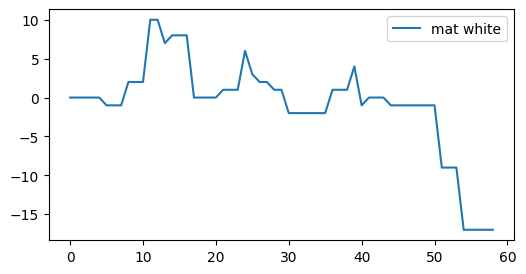

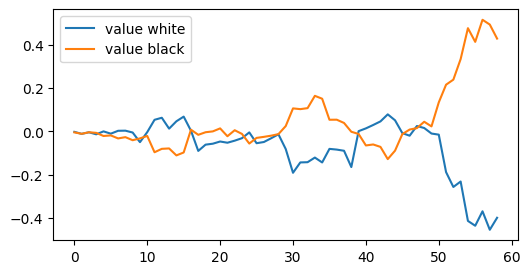

 -- 35160 -- winner: black, i: 70    wins: w = 5135, b = 5115.0, d = 17014
 -- 35170 -- winner: black, i: 78    wins: w = 5142, b = 5118.0, d = 17031
 -- 35180 -- winner: black, i: 120    wins: w = 5146, b = 5124.0, d = 17051
 -- 35190 -- winner: black, i: 22    wins: w = 5147, b = 5133.0, d = 17068
 -- 35200 -- winner: white, i: 43    wins: w = 5153, b = 5137.0, d = 17081


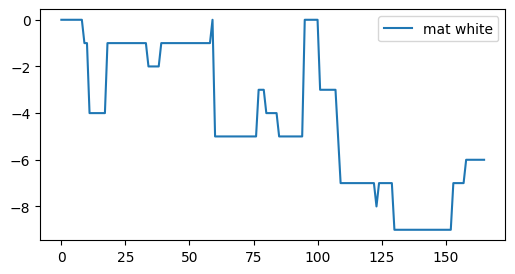

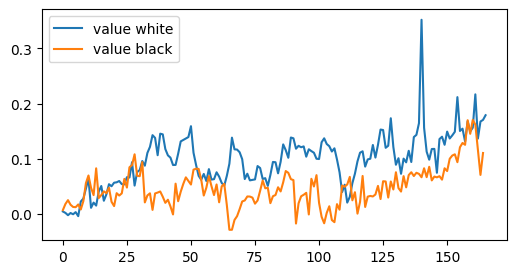

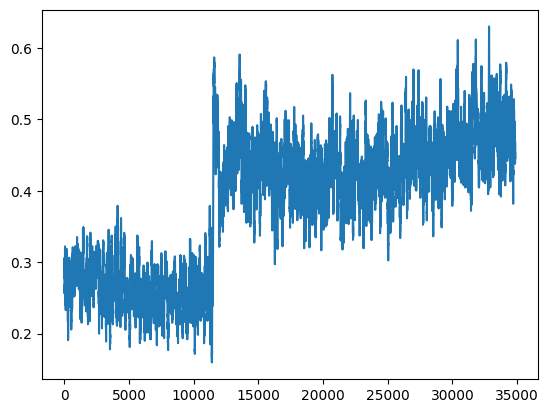

 -- 35210 -- winner: white, i: 77    wins: w = 5157, b = 5143.0, d = 17095
 -- 35220 -- winner: white, i: 89    wins: w = 5165, b = 5145.0, d = 17101
 -- 35230 -- winner: white, i: 127    wins: w = 5170, b = 5150.0, d = 17112
 -- 35240 -- winner: black, i: 80    wins: w = 5174, b = 5156.0, d = 17125
 -- 35250 -- winner: black, i: 66    wins: w = 5176, b = 5164.0, d = 17133


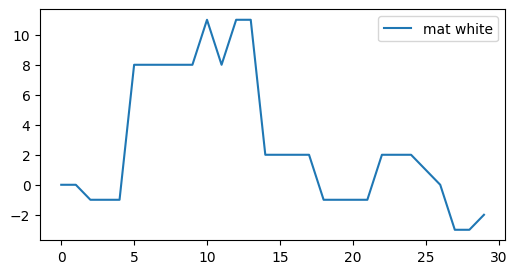

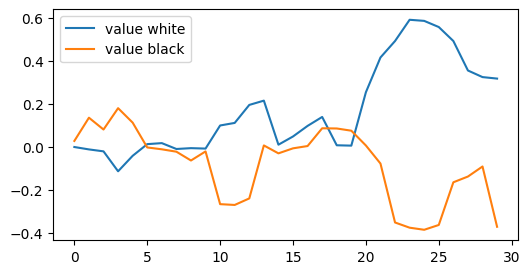

 -- 35260 -- winner: black, i: 14    wins: w = 5179, b = 5171.0, d = 17142
 -- 35270 -- winner: white, i: 43    wins: w = 5185, b = 5175.0, d = 17152
 -- 35280 -- winner: black, i: 214    wins: w = 5190, b = 5180.0, d = 17165
 -- 35290 -- winner: black, i: 74    wins: w = 5195, b = 5185.0, d = 17172
 -- 35300 -- winner: black, i: 10    wins: w = 5203, b = 5187.0, d = 17187


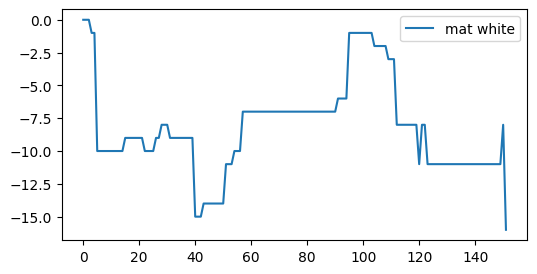

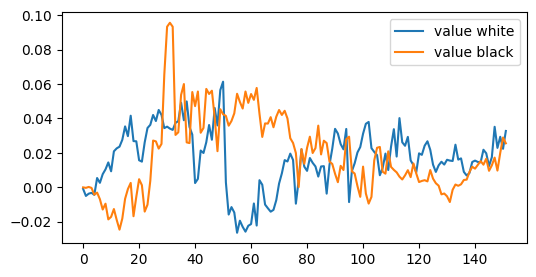

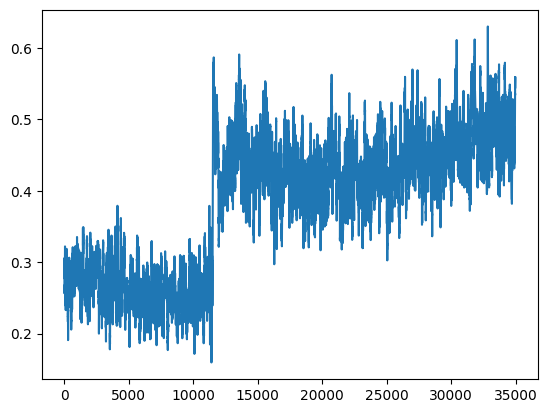

 -- 35310 -- winner: black, i: 76    wins: w = 5206, b = 5194.0, d = 17191
 -- 35320 -- winner: white, i: 39    wins: w = 5211, b = 5199.0, d = 17210
 -- 35330 -- winner: black, i: 90    wins: w = 5216, b = 5204.0, d = 17221
 -- 35340 -- winner: black, i: 88    wins: w = 5221, b = 5209.0, d = 17231
 -- 35350 -- winner: white, i: 81    wins: w = 5228, b = 5212.0, d = 17240


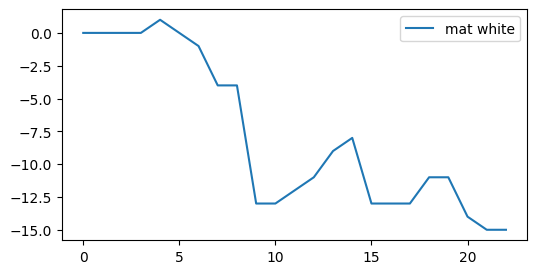

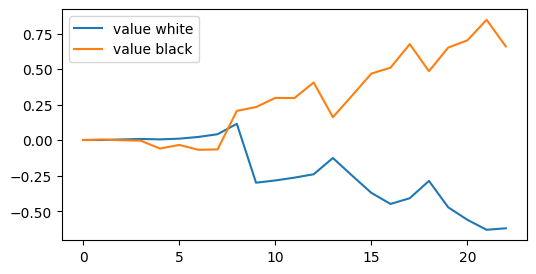

 -- 35360 -- winner: white, i: 89    wins: w = 5233, b = 5217.0, d = 17266
 -- 35370 -- winner: black, i: 116    wins: w = 5239, b = 5221.0, d = 17286
 -- 35380 -- winner: black, i: 66    wins: w = 5243, b = 5227.0, d = 17298
 -- 35390 -- winner: black, i: 100    wins: w = 5249, b = 5231.0, d = 17326
 -- 35400 -- winner: white, i: 67    wins: w = 5256, b = 5234.0, d = 17339


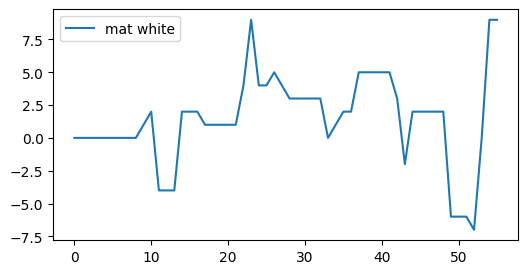

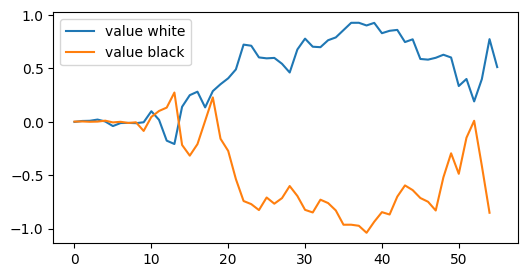

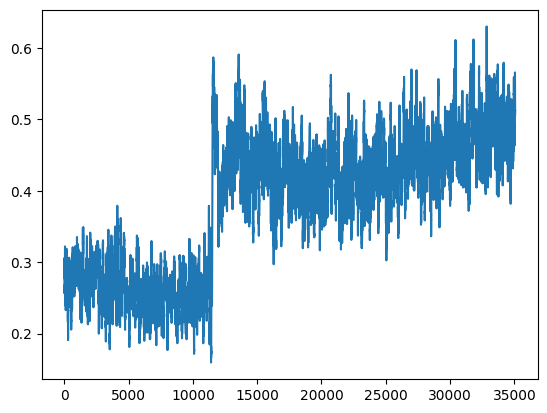

 -- 35410 -- winner: black, i: 74    wins: w = 5262, b = 5238.0, d = 17349
 -- 35420 -- winner: white, i: 73    wins: w = 5267, b = 5243.0, d = 17360
 -- 35430 -- winner: white, i: 73    wins: w = 5269, b = 5251.0, d = 17375
 -- 35440 -- winner: white, i: 63    wins: w = 5273, b = 5257.0, d = 17386
 -- 35450 -- winner: black, i: 80    wins: w = 5277, b = 5263.0, d = 17405


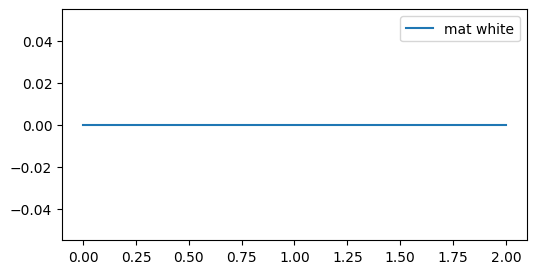

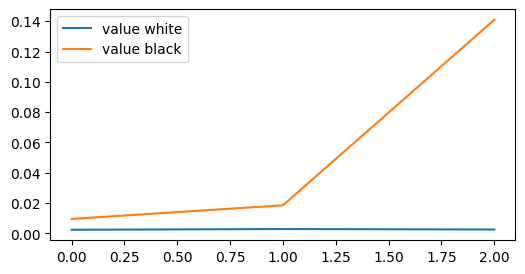

 -- 35460 -- winner: black, i: 80    wins: w = 5280, b = 5270.0, d = 17421
 -- 35470 -- winner: white, i: 91    wins: w = 5286, b = 5274.0, d = 17431
 -- 35480 -- winner: black, i: 72    wins: w = 5291, b = 5279.0, d = 17453
 -- 35490 -- winner: black, i: 148    wins: w = 5297, b = 5283.0, d = 17467
 -- 35500 -- winner: white, i: 63    wins: w = 5301, b = 5289.0, d = 17480


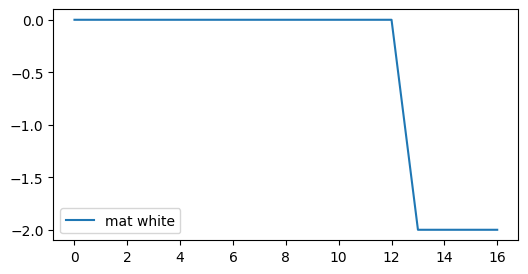

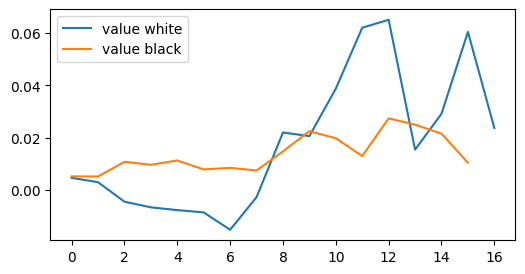

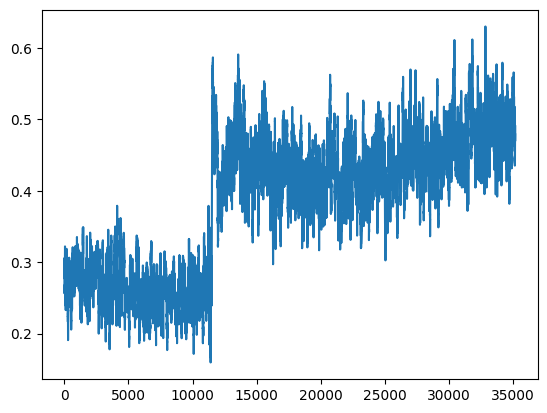

 -- 35510 -- winner: black, i: 66    wins: w = 5306, b = 5294.0, d = 17493
 -- 35520 -- winner: white, i: 61    wins: w = 5313, b = 5297.0, d = 17506
 -- 35530 -- winner: black, i: 142    wins: w = 5318, b = 5302.0, d = 17533
 -- 35540 -- winner: white, i: 69    wins: w = 5326, b = 5304.0, d = 17540
game termianted, mat diff =  -12
 -- 35550 -- winner: white, i: 73    wins: w = 5331, b = 5308.5, d = 17560


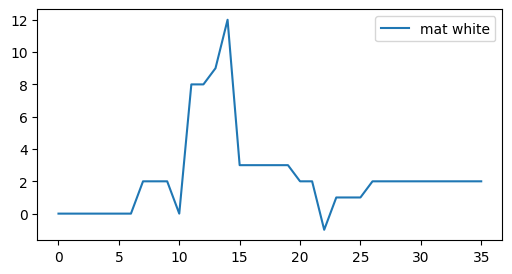

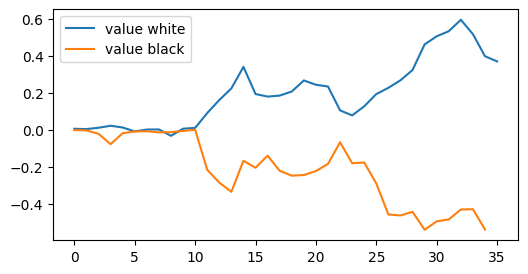

 -- 35560 -- winner: white, i: 41    wins: w = 5336, b = 5313.5, d = 17574
 -- 35570 -- winner: white, i: 23    wins: w = 5343, b = 5316.5, d = 17593
 -- 35580 -- winner: white, i: 45    wins: w = 5349, b = 5320.5, d = 17611
 -- 35590 -- winner: white, i: 105    wins: w = 5352, b = 5327.5, d = 17629
 -- 35600 -- winner: black, i: 94    wins: w = 5358, b = 5331.5, d = 17637


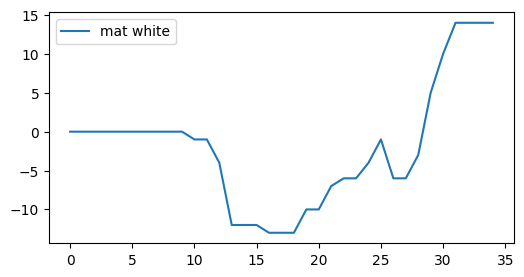

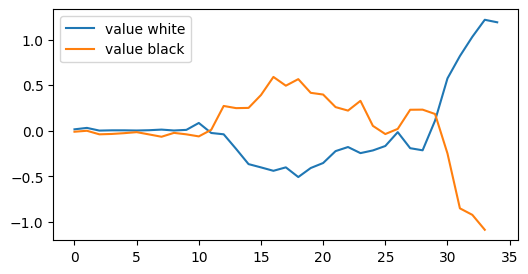

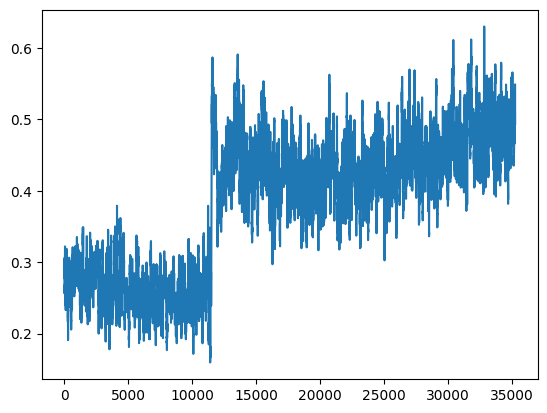

 -- 35610 -- winner: white, i: 77    wins: w = 5361, b = 5338.5, d = 17671
 -- 35620 -- winner: white, i: 79    wins: w = 5367, b = 5342.5, d = 17674
 -- 35630 -- winner: black, i: 94    wins: w = 5372, b = 5347.5, d = 17686
 -- 35640 -- winner: white, i: 77    wins: w = 5378, b = 5351.5, d = 17693
 -- 35650 -- winner: white, i: 133    wins: w = 5385, b = 5354.5, d = 17705


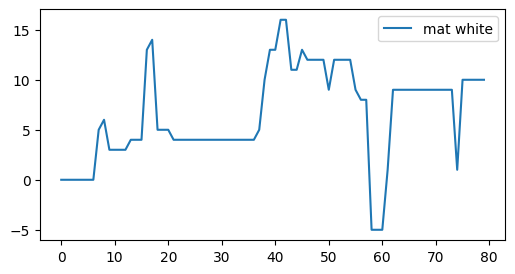

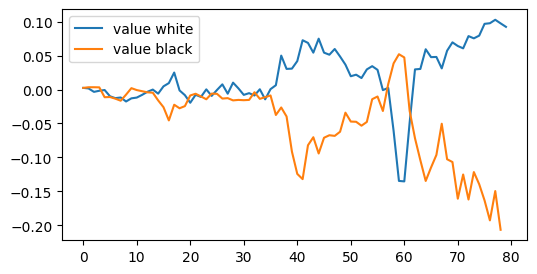

 -- 35660 -- winner: black, i: 102    wins: w = 5391, b = 5358.5, d = 17712
 -- 35670 -- winner: white, i: 49    wins: w = 5398, b = 5361.5, d = 17731
 -- 35680 -- winner: black, i: 10    wins: w = 5403, b = 5366.5, d = 17749
 -- 35690 -- winner: white, i: 91    wins: w = 5410, b = 5369.5, d = 17769
 -- 35700 -- winner: white, i: 23    wins: w = 5415, b = 5374.5, d = 17775


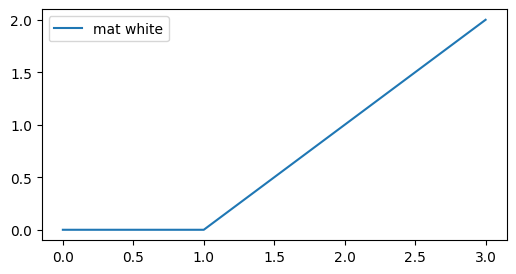

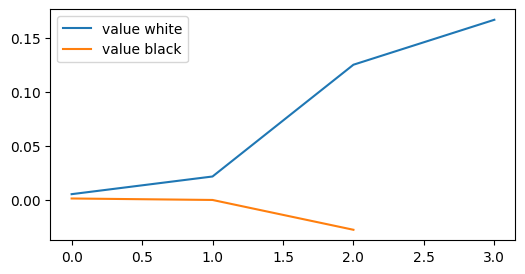

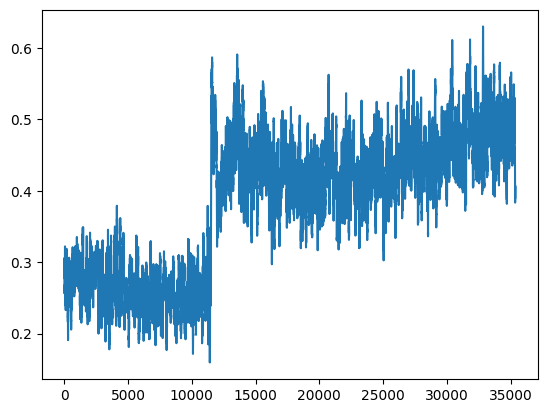

 -- 35710 -- winner: white, i: 37    wins: w = 5421, b = 5378.5, d = 17800
 -- 35720 -- winner: black, i: 80    wins: w = 5423, b = 5386.5, d = 17820
 -- 35730 -- winner: white, i: 7    wins: w = 5432, b = 5387.5, d = 17836
 -- 35740 -- winner: black, i: 38    wins: w = 5435, b = 5394.5, d = 17854
 -- 35750 -- winner: white, i: 81    wins: w = 5437, b = 5402.5, d = 17865


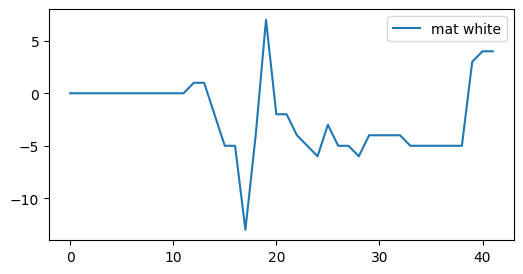

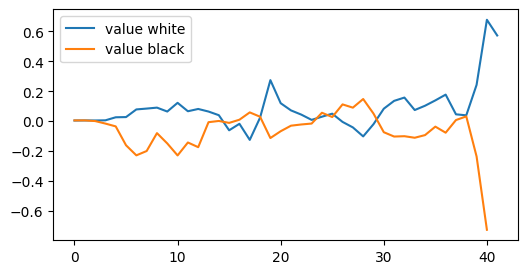

 -- 35760 -- winner: white, i: 69    wins: w = 5442, b = 5407.5, d = 17879
 -- 35770 -- winner: black, i: 42    wins: w = 5447, b = 5412.5, d = 17891
 -- 35780 -- winner: white, i: 95    wins: w = 5454, b = 5415.5, d = 17899
 -- 35790 -- winner: black, i: 68    wins: w = 5459, b = 5420.5, d = 17916
 -- 35800 -- winner: black, i: 92    wins: w = 5463, b = 5426.5, d = 17940


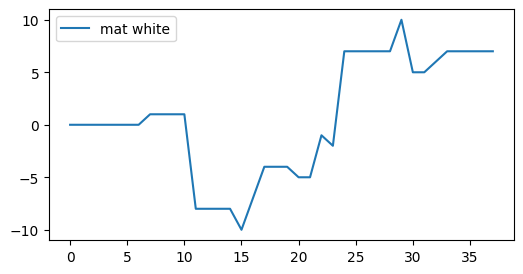

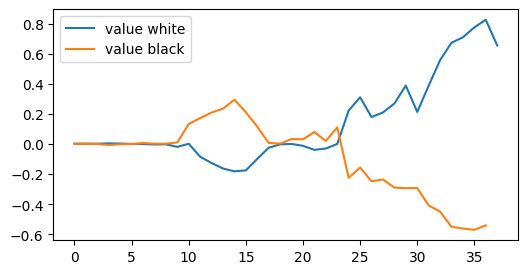

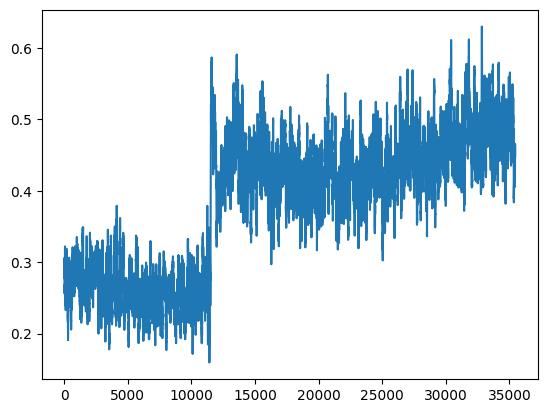

 -- 35810 -- winner: white, i: 105    wins: w = 5470, b = 5429.5, d = 17944
 -- 35820 -- winner: white, i: 53    wins: w = 5478, b = 5431.5, d = 17955
 -- 35830 -- winner: white, i: 49    wins: w = 5484, b = 5435.5, d = 17978
 -- 35840 -- winner: black, i: 10    wins: w = 5487, b = 5442.5, d = 17986
 -- 35850 -- winner: white, i: 73    wins: w = 5490, b = 5449.5, d = 18000


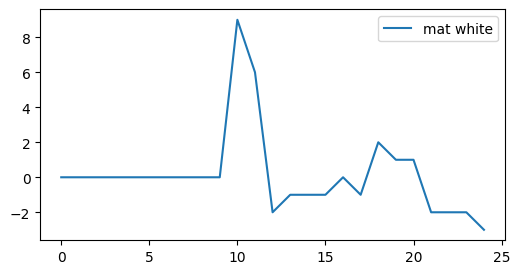

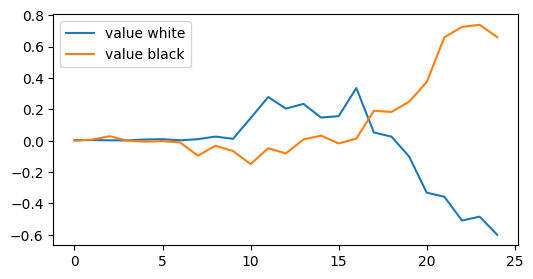

 -- 35860 -- winner: white, i: 43    wins: w = 5493, b = 5456.5, d = 18019
 -- 35870 -- winner: black, i: 66    wins: w = 5498, b = 5461.5, d = 18034
 -- 35880 -- winner: black, i: 88    wins: w = 5503, b = 5466.5, d = 18050
 -- 35890 -- winner: white, i: 91    wins: w = 5509, b = 5470.5, d = 18062
 -- 35900 -- winner: white, i: 79    wins: w = 5514, b = 5475.5, d = 18077


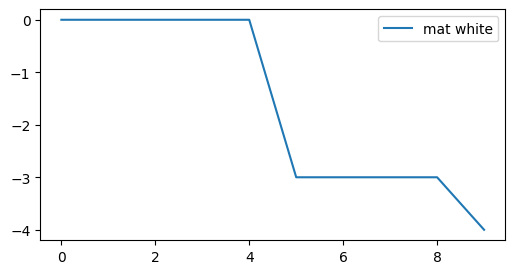

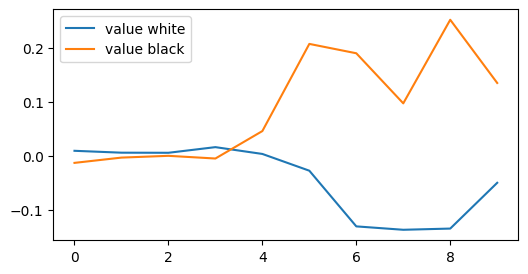

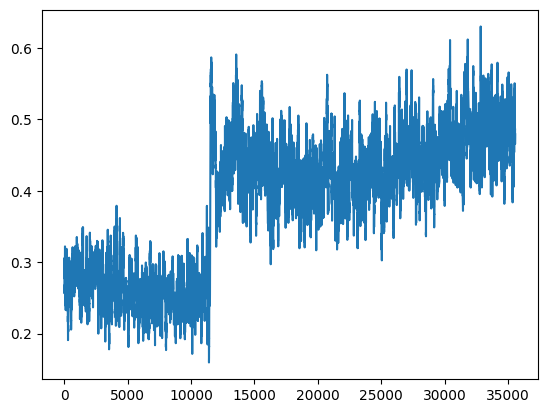

 -- 35910 -- winner: white, i: 77    wins: w = 5519, b = 5480.5, d = 18095
 -- 35920 -- winner: white, i: 23    wins: w = 5523, b = 5486.5, d = 18108
 -- 35930 -- winner: black, i: 82    wins: w = 5526, b = 5493.5, d = 18114
 -- 35940 -- winner: white, i: 49    wins: w = 5532, b = 5497.5, d = 18139
 -- 35950 -- winner: black, i: 6    wins: w = 5537, b = 5502.5, d = 18160


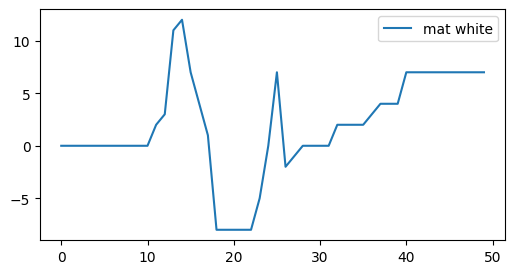

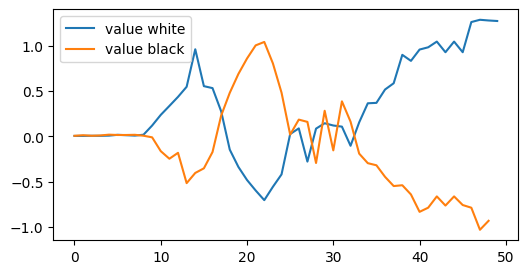

 -- 35960 -- winner: white, i: 101    wins: w = 5544, b = 5505.5, d = 18176
 -- 35970 -- winner: white, i: 111    wins: w = 5550, b = 5509.5, d = 18191
 -- 35980 -- winner: white, i: 75    wins: w = 5555, b = 5514.5, d = 18204
 -- 35990 -- winner: white, i: 105    wins: w = 5560, b = 5519.5, d = 18220
 -- 36000 -- winner: white, i: 11    wins: w = 5565, b = 5524.5, d = 18230


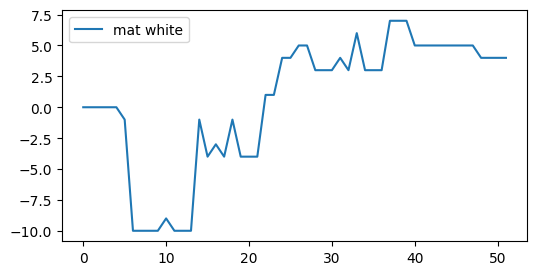

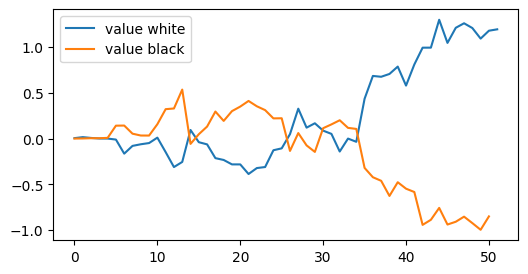

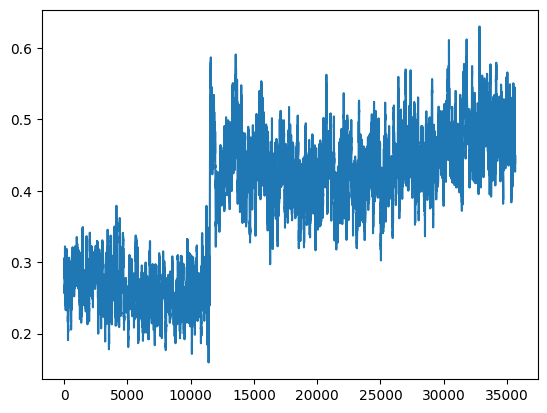

 -- 36010 -- winner: white, i: 119    wins: w = 5568, b = 5531.5, d = 18235
 -- 36020 -- winner: black, i: 90    wins: w = 5573, b = 5536.5, d = 18246
 -- 36030 -- winner: black, i: 100    wins: w = 5577, b = 5542.5, d = 18250
 -- 36040 -- winner: black, i: 118    wins: w = 5583, b = 5546.5, d = 18256
 -- 36050 -- winner: black, i: 82    wins: w = 5585, b = 5554.5, d = 18276


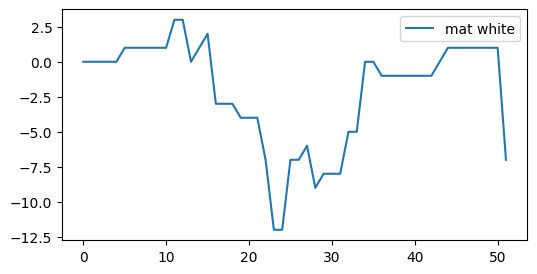

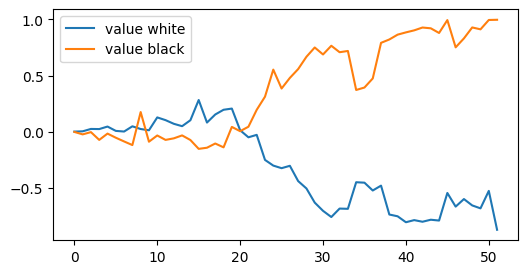

 -- 36060 -- winner: black, i: 14    wins: w = 5591, b = 5558.5, d = 18290
 -- 36070 -- winner: white, i: 57    wins: w = 5596, b = 5563.5, d = 18304
 -- 36080 -- winner: white, i: 25    wins: w = 5601, b = 5568.5, d = 18322
 -- 36090 -- winner: white, i: 93    wins: w = 5608, b = 5571.5, d = 18338
 -- 36100 -- winner: white, i: 49    wins: w = 5614, b = 5575.5, d = 18345


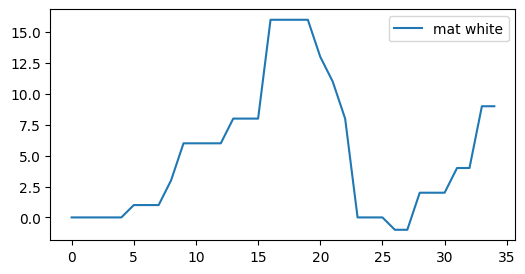

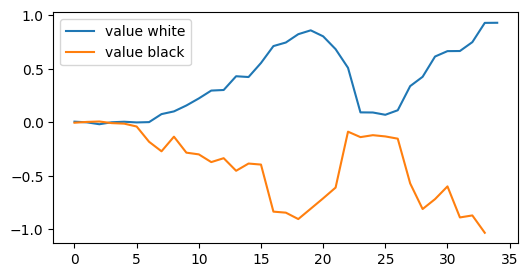

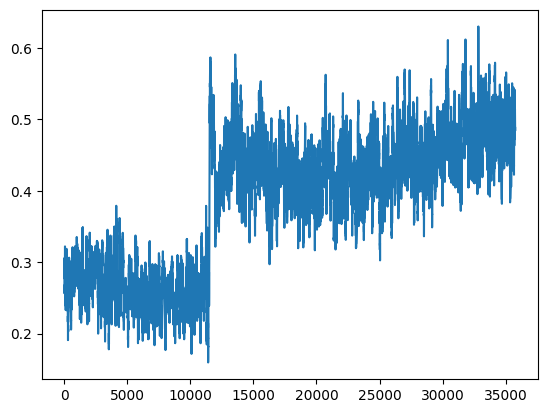

 -- 36110 -- winner: black, i: 84    wins: w = 5616, b = 5583.5, d = 18366
 -- 36120 -- winner: black, i: 14    wins: w = 5620, b = 5589.5, d = 18376
 -- 36130 -- winner: black, i: 52    wins: w = 5625, b = 5594.5, d = 18387
 -- 36140 -- winner: black, i: 80    wins: w = 5631, b = 5598.5, d = 18392
 -- 36150 -- winner: white, i: 159    wins: w = 5637, b = 5602.5, d = 18407


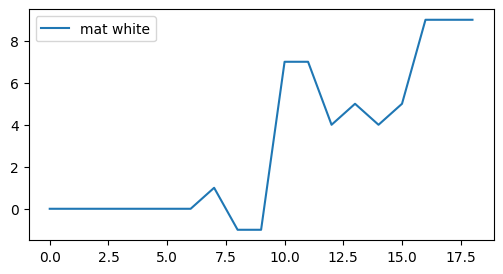

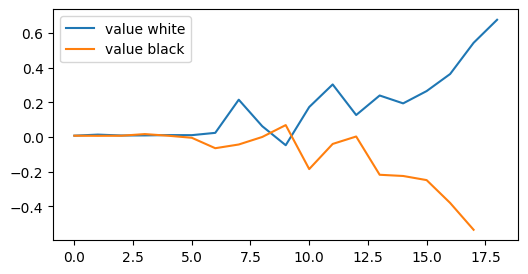

 -- 36160 -- winner: black, i: 30    wins: w = 5643, b = 5606.5, d = 18424
 -- 36170 -- winner: white, i: 41    wins: w = 5650, b = 5609.5, d = 18456
 -- 36180 -- winner: white, i: 61    wins: w = 5658, b = 5611.5, d = 18467
 -- 36190 -- winner: black, i: 116    wins: w = 5662, b = 5617.5, d = 18473
 -- 36200 -- winner: black, i: 44    wins: w = 5667, b = 5622.5, d = 18491


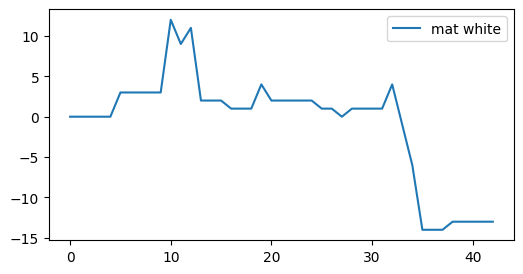

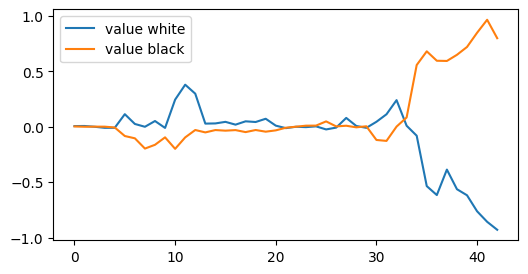

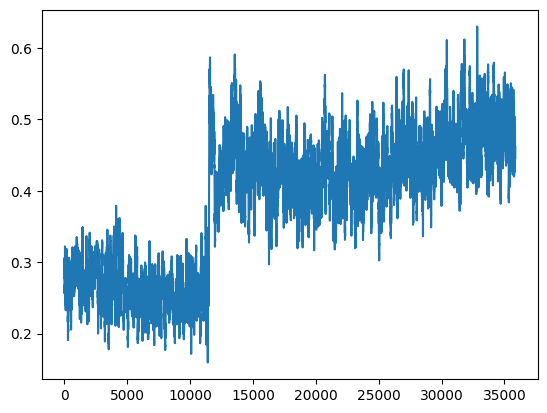

 -- 36210 -- winner: black, i: 104    wins: w = 5669, b = 5630.5, d = 18497
 -- 36220 -- winner: black, i: 60    wins: w = 5672, b = 5637.5, d = 18511
 -- 36230 -- winner: black, i: 80    wins: w = 5675, b = 5644.5, d = 18526
 -- 36240 -- winner: black, i: 84    wins: w = 5680, b = 5649.5, d = 18539
 -- 36250 -- winner: black, i: 112    wins: w = 5685, b = 5654.5, d = 18552


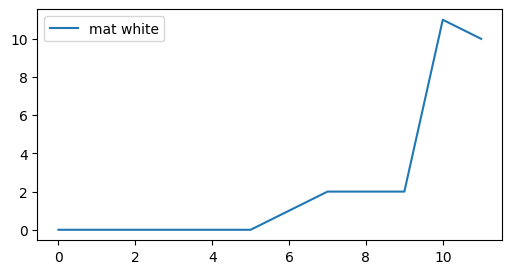

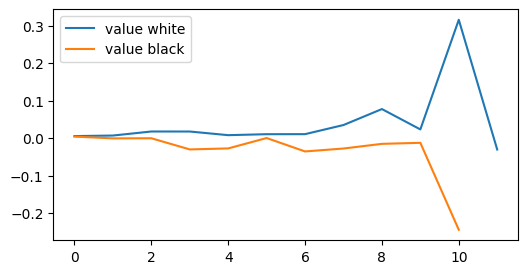

 -- 36260 -- winner: white, i: 53    wins: w = 5693, b = 5656.5, d = 18568
 -- 36270 -- winner: white, i: 109    wins: w = 5695, b = 5664.5, d = 18584
 -- 36280 -- winner: white, i: 97    wins: w = 5700, b = 5669.5, d = 18598
 -- 36290 -- winner: black, i: 58    wins: w = 5704, b = 5675.5, d = 18620
 -- 36300 -- winner: black, i: 62    wins: w = 5709, b = 5680.5, d = 18637


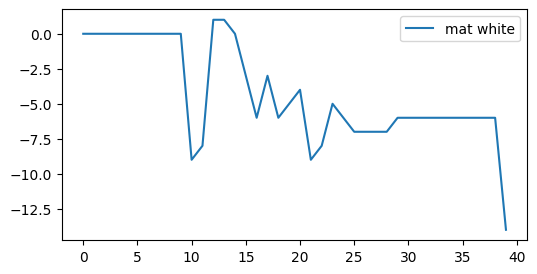

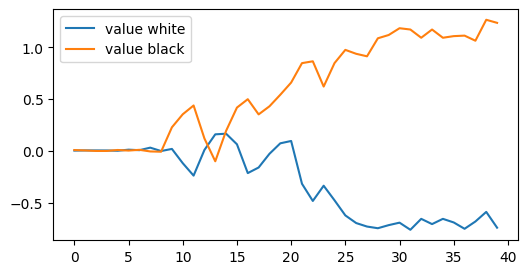

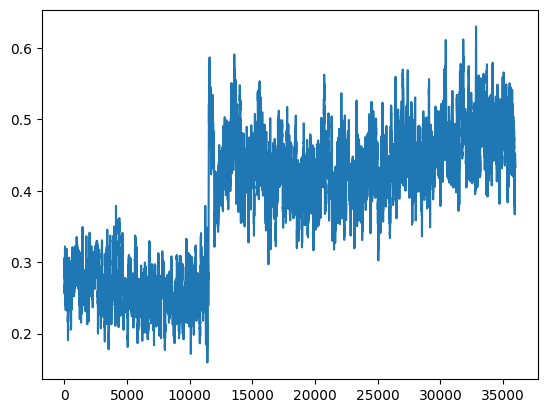

 -- 36310 -- winner: white, i: 103    wins: w = 5715, b = 5684.5, d = 18642
 -- 36320 -- winner: black, i: 70    wins: w = 5723, b = 5686.5, d = 18652
 -- 36330 -- winner: white, i: 89    wins: w = 5729, b = 5690.5, d = 18659
 -- 36340 -- winner: black, i: 76    wins: w = 5733, b = 5696.5, d = 18666
 -- 36350 -- winner: black, i: 66    wins: w = 5737, b = 5702.5, d = 18684


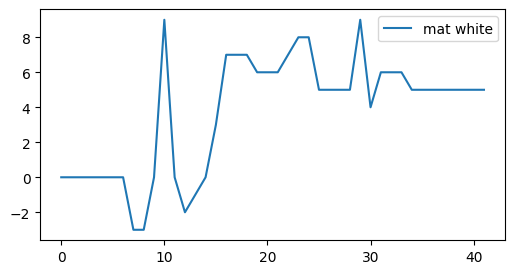

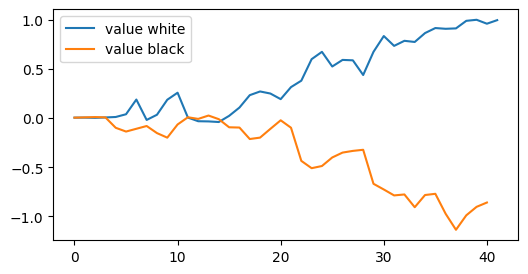

 -- 36360 -- winner: white, i: 87    wins: w = 5745, b = 5704.5, d = 18707
 -- 36370 -- winner: black, i: 66    wins: w = 5748, b = 5711.5, d = 18716
 -- 36380 -- winner: black, i: 74    wins: w = 5755, b = 5714.5, d = 18739
 -- 36390 -- winner: white, i: 49    wins: w = 5763, b = 5716.5, d = 18763
 -- 36400 -- winner: black, i: 64    wins: w = 5764, b = 5725.5, d = 18775


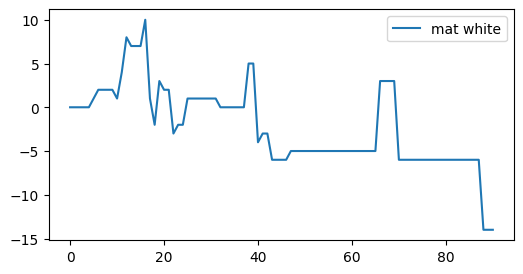

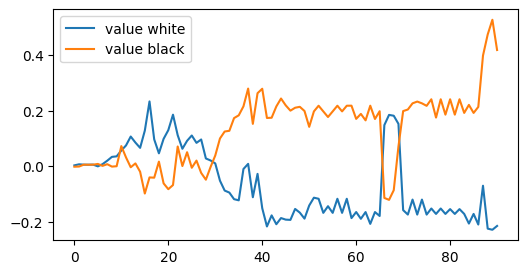

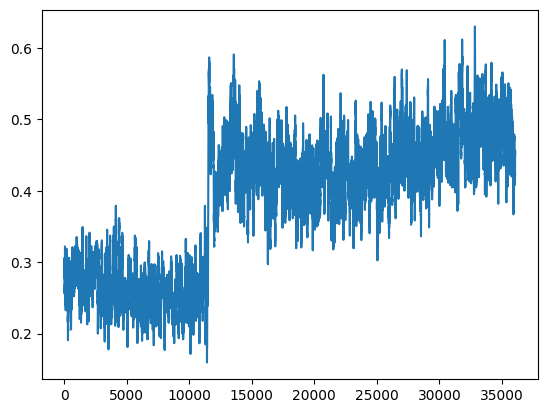

 -- 36410 -- winner: white, i: 117    wins: w = 5769, b = 5730.5, d = 18790
 -- 36420 -- winner: black, i: 70    wins: w = 5770, b = 5739.5, d = 18800
 -- 36430 -- winner: black, i: 108    wins: w = 5775, b = 5744.5, d = 18816
 -- 36440 -- winner: black, i: 30    wins: w = 5780, b = 5749.5, d = 18827
 -- 36450 -- winner: black, i: 62    wins: w = 5784, b = 5755.5, d = 18845


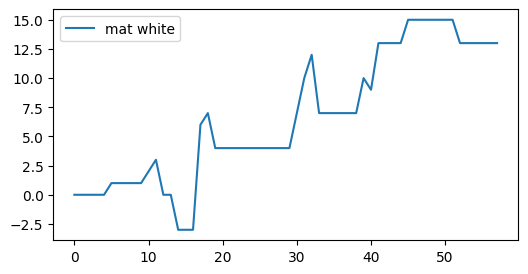

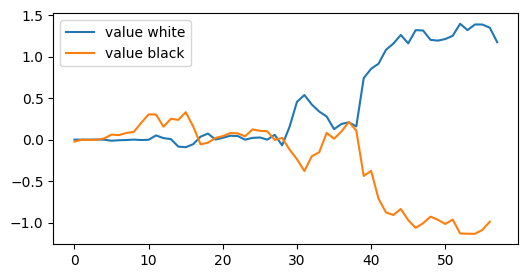

 -- 36460 -- winner: white, i: 103    wins: w = 5789, b = 5760.5, d = 18856
 -- 36470 -- winner: black, i: 6    wins: w = 5796, b = 5763.5, d = 18875
 -- 36480 -- winner: white, i: 89    wins: w = 5799, b = 5770.5, d = 18892
 -- 36490 -- winner: white, i: 15    wins: w = 5806, b = 5773.5, d = 18908
 -- 36500 -- winner: black, i: 28    wins: w = 5810, b = 5779.5, d = 18925


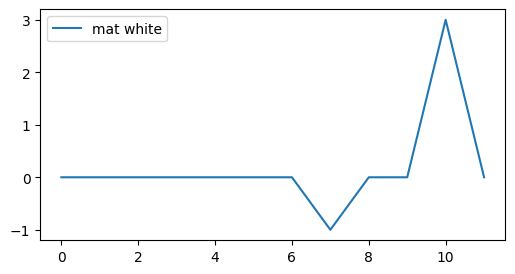

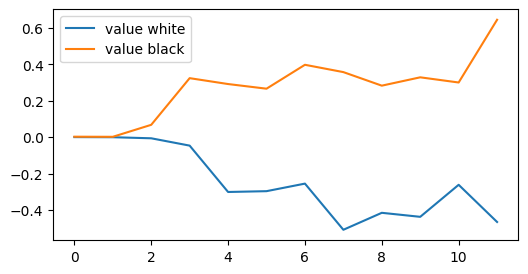

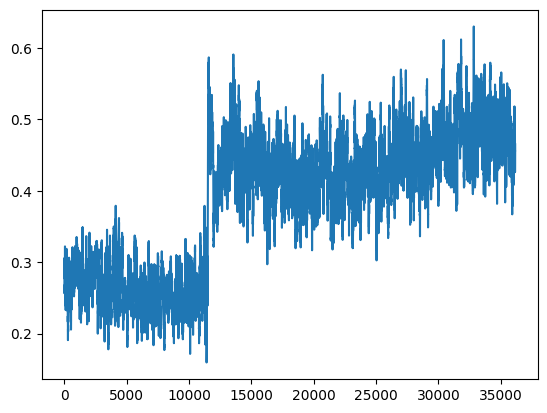

 -- 36510 -- winner: black, i: 30    wins: w = 5814, b = 5785.5, d = 18935
 -- 36520 -- winner: white, i: 57    wins: w = 5819, b = 5790.5, d = 18945
 -- 36530 -- winner: black, i: 20    wins: w = 5823, b = 5796.5, d = 18953
 -- 36540 -- winner: white, i: 39    wins: w = 5828, b = 5801.5, d = 18973


KeyboardInterrupt: 

In [62]:
i_limit = 1000
while True:
    t0 = time.time()

    game = Game()
    next_root = None
    i = 0
    boards_white = [];  boards_black = []
    mat_white = [];     mat_black = []
    value_white = [];   value_black = []

    model.eval()

    while not game.is_over():
        i += 1
        if i > i_limit:
            break

        current_boards = []; current_labels = []
    
        moves = game.PossibleMoves()

        game_ini = game.copy()
        board_batch = [board_to_tensor(game.pieces)]

        mate = False

        for move in moves:
            game.PlayMove(move)
            board_batch.append(board_to_tensor(game.pieces))
            game.FlipBoard()
            if game.is_over():
                mate = True
                chosen_move = move
                game = game_ini.copy()
                break
            game = game_ini.copy()

        if not mate:

            board_tensor = torch.stack(board_batch)
            values = model(board_tensor)
            if i < 11:
                scale = value_diff_scale/15
            elif i < 21:
                scale = value_diff_scale/3
            else:
                scale = value_diff_scale*3
            values_diff = [scale*(values[i] - values[0]) for i in range(1, len(values))]
            move_prob = torch.softmax(torch.Tensor(values_diff), dim=0).numpy()
            chosen_i = np.random.choice(range(len(moves)), p=move_prob)
            chosen_move = moves[chosen_i]
            
        game.PlayMove(chosen_move)

        mat_diff = game.MaterialDiff()
        value = model(torch.stack([board_to_tensor(game.pieces)])).detach().item()

        if i % 2 == 1:
            boards_white.append(board_to_tensor(game.pieces))
            mat_white.append(mat_diff)
            value_white.append(value)
        if i % 2 == 0:
            boards_black.append(board_to_tensor(game.pieces))
            mat_black.append(mat_diff)
            value_black.append(value)

        game.FlipBoard()

    if i <= i_limit: # game actually ended
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1;         reward_white = 0;   reward_black = 0
        if winner == 'white':
            white_wins += 1;    reward_white = 1;   reward_black = -1
        if winner == 'black':
            black_wins += 1;    reward_white = -1;  reward_black = 1

    else: # game terminated because too long
        matdiff = game.MaterialDiff()
        if matdiff > 4:
            if game.turn == 'white':
                winner = 'white'; reward_white = 0.5;   reward_black = -0.5;    white_wins += 0.5
            if game.turn == 'black':
                winner = 'black'; reward_white = -0.5;  reward_black = 0.5;     black_wins = 0.5
        elif matdiff < -4:
            if game.turn == 'white':
                winner = 'black'; reward_white = -0.5;  reward_black = 0.5;     black_wins += 0.5
            if game.turn == 'black':
                winner = 'white'; reward_white = 0.5;   reward_black = -0.5;    white_wins = 0.5
        else:
            winner = 'draw'; draws += 1; reward_white = 0; reward_black = 0

    if i > i_limit:
        print('game termianted, mat diff = ', matdiff)

    game_time = time.time() - t0

    labels_white = [reward_white * gamma**(len(boards_white) - 1 - i) for i in range(len(boards_white))]
    labels_black = [reward_black * gamma**(len(boards_black) - 1 - i) for i in range(len(boards_black))]

    inputs = boards_white + boards_black
    labels = labels_white + labels_black

    inputs_tens = torch.stack(inputs)
    labels_tens = torch.Tensor(labels)   

    if winner != 'draw':
        # newest training error
        out = model(inputs_tens)
        out = out.view(out.shape[0])
        loss = criterion(out, labels_tens)
        error_hist.append(loss.item())
    else:
        draw_count += 1
        continue

    if game_count % 10 == 0:
        print(' -- {} -- winner: {}, i: {}   '.format(game_count, winner, i), 'wins: w = {}, b = {}, d = {}'.format(white_wins, black_wins, draws))
    

    if game_count % 50 == 1:# or True:
        plt.figure(figsize=(6, 3))
        plt.plot(mat_white, label='mat white')
        plt.legend()
        plt.show()
        plt.figure(figsize=(6, 3))
        plt.plot(value_white, label='value white')
        plt.plot(value_black, label='value black')
        plt.legend()
        plt.show()

    torch.save(inputs_tens, './Game Saves MC v4/inputs_{}'.format(game_count))
    torch.save(labels_tens, './Game Saves MC v4/labels_{}'.format(game_count))

    t1 = time.time()

    if game_count > 5:
        # sample some of previous game for replay. More recent -> more likely
        decay_rate = 0.003
        prob =  np.exp(-decay_rate * np.arange(game_count)) 
        prob = prob /sum(prob)
        num_samples = 3
        samples = np.random.choice(np.arange(game_count, 0, -1), size=num_samples, p=prob)

        for indices in samples:
            inputs_load = torch.load('./Game Saves MC v4/inputs_{}'.format(indices))
            inputs_tens = torch.cat((inputs_load, inputs_tens))
            labels_tens = torch.cat((torch.load('./Game Saves MC v4/labels_{}'.format(indices)), labels_tens))

    len_boards = len(inputs_tens)
    for c in range(len_boards):
        tens = inputs_tens[c]
        # if no pawns are on the board: add all other 3 rotated versions of the board to the current data set
        if torch.sum(inputs_tens[c][0]) + torch.sum(inputs_tens[c][6]) == 0:
            board_new = tensor_to_board(tens)
            for _ in range(3):
                board_new = rotate_board(board_new, 1)
                tens_new = torch.stack([board_to_tensor(board_new)])
                inputs_tens = torch.cat((inputs_tens, tens_new), 0)
                labels_tens = torch.cat((labels_tens, torch.stack([labels_tens[c]])), 0)
    
    model.train()
    # learning_rate = 5e-4 * 500 / (500 + game_count) # reducing learning rate, 1/n one possible options
    learning_rate = 5e-5
    # weight_decay = 1e-2 # regularization to avoid overfitting
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    random_order = [i for i in range(len(inputs_tens))]
    np.random.shuffle(random_order)
    for c in random_order:

        inp = torch.stack([inputs_tens[c], mirror_board_tensor(inputs_tens[c])])
        label = torch.stack([labels_tens[c], labels_tens[c]])

        out = model(inp)
        out = out.view(out.shape[0])

        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()

        # torch.nn.utils.clip_grad_norm_(model.parameters(), max_gradient_norm)
        optimizer.step()

    # print('game time: {} -- training time: {},  '.format(game_time, time.time() - t1))
    # print('sum of losses: ', sum(err_curr))

    # error_hist.append(sum(err_curr))
    
    torch.save(error_hist, './error_hist MC v4')

    if game_count % 100  == 1:
        # plt.plot(error_hist)
        # plt.title('training errors')
        # plt.show()
        interval = 50
        plt.figure()
        plt.plot([np.mean(error_hist[i:i+interval]) for i in range(len(error_hist) - interval)])
        plt.show()

    if game_count % 100 == 9:    
        torch.save(model.state_dict(), './Model Saves MC v4/model_{}_games'.format(game_count+1))

    game_count += 1


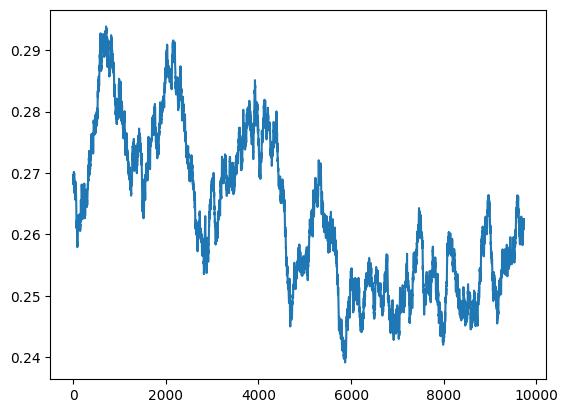

In [25]:
interval = 500
plt.figure()
plt.plot([np.mean(error_hist[i:i+interval]) for i in range(len(error_hist) - interval)])
plt.show()

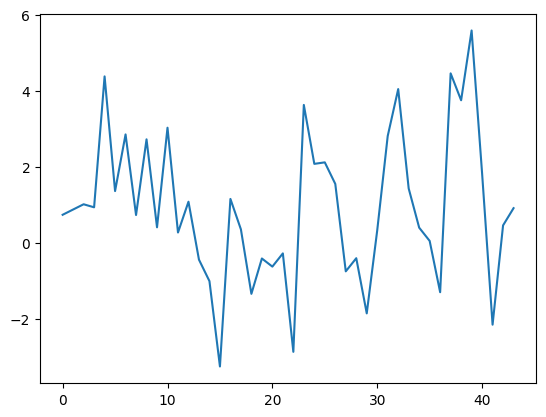

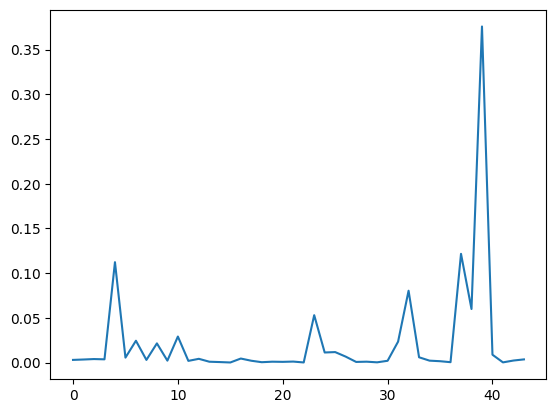

In [41]:
values_diff = [(values[i] - values[0])*50 for i in range(1, len(values))]


plt.plot(values_diff)
plt.show()

move_prob = torch.softmax(torch.Tensor(values_diff), dim=0).numpy()
plt.plot(move_prob)
plt.show()